<a href="https://colab.research.google.com/github/fedrikkhou/fedrikkhou/blob/main/Revo_Bank_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#List the goal of the analysis
1.   Understanding of the spending patterns among RevoShop customers who are RevoBank credit card users
2.   Provide an overview of the promotion program's performance from revobanks perspective and find ways to reduce the cost of the promotion
3.   Identify different segments of Revobank credit card users who are Revoshop customers and discover business opportunities to customize the rewards program for each customer segment







#Import Library

In [ ]:
import pandas as pd                 # Library used for working with data sets and perform data analysis.
import numpy as np                  # To perform mathematical operasion and statistics
from datetime import datetime       # Used to perform dates and time manipulation
import seaborn as sns               # To perform data visualization
import matplotlib.pyplot as plt     # To perform data visualization

# CLUSTER
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)

import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis
from sklearn.datasets import make_blobs
from yellowbrick.cluster import SilhouetteVisualizer

#Import Dataset

In [ ]:
#https://drive.google.com/file/d/1DjiAMpa1iDsUYAImQw13rcPsAilRS0LR/view
csv_source_url = 'https://drive.google.com/uc?id=1DjiAMpa1iDsUYAImQw13rcPsAilRS0LR'
df_bank_promotion_ori = pd.read_csv(csv_source_url)

In [ ]:
df_bank_promotion_ori.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21


#Data Cleaning

In [ ]:
df_bank_promotion_dc = df_bank_promotion_ori.copy()

###A) Check Data Type

In [ ]:
df_bank_promotion_dc.shape

(112634, 24)

In [ ]:
df_bank_promotion_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ACCOUNT_ID             112634 non-null  int64  
 1   MCC                    112634 non-null  object 
 2   MERCHANT_NAME          112634 non-null  object 
 3   AVG_TXN_AMT_L6M        112634 non-null  float64
 4   AVG_TXN_AMT_LTM        112634 non-null  float64
 5   AVG_PROMO_TXN_AMT_L6M  112634 non-null  float64
 6   AVG_PROMO_TXN_AMT_LTM  112634 non-null  float64
 7   TXN_CNT_L6M            112634 non-null  float64
 8   TXN_CNT_LTM            112634 non-null  float64
 9   PROMO_TXN_CNT_L6M      112634 non-null  float64
 10  PROMO_TXN_CNT_LTM      112634 non-null  float64
 11  LAST_TXN_DAY           112634 non-null  float64
 12  CNT_PROMO_L6M          112634 non-null  float64
 13  CNT_PROMO_L12M         112634 non-null  float64
 14  CUST_VALUE_GROUP       112634 non-nu

*   ACCOUNT_ID change to string
*   BIRTH_DATE change to datetime

Feedback from TL: maybe u can be more attentive to some data types like homeowner_status, MOB, flag_female, and promo_channel can be transformed into integer since its categorical

*   HOMEOWNER_STATUS change to int
*   MOB change to int
*   FLAG_FEMALE change to int
*   PROMO CHANNEL change to int







##B) Check Missing Value

In [ ]:
df_bank_promotion_dc.isnull().sum()

ACCOUNT_ID               0
MCC                      0
MERCHANT_NAME            0
AVG_TXN_AMT_L6M          0
AVG_TXN_AMT_LTM          0
AVG_PROMO_TXN_AMT_L6M    0
AVG_PROMO_TXN_AMT_LTM    0
TXN_CNT_L6M              0
TXN_CNT_LTM              0
PROMO_TXN_CNT_L6M        0
PROMO_TXN_CNT_LTM        0
LAST_TXN_DAY             0
CNT_PROMO_L6M            0
CNT_PROMO_L12M           0
CUST_VALUE_GROUP         0
MAPP_ACTIVE_GROUP        0
HOMEOWNER_STATUS         0
HOME_VALUE               0
PROXY_INCOME             0
PCT_INCOME_RETIREMENT    0
MOB                      0
FLAG_FEMALE              0
PROMO_CHANNEL            0
BIRTH_DATE               0
dtype: int64

In [ ]:
df_bank_promotion_dc[df_bank_promotion_dc['AVG_PROMO_TXN_AMT_L6M'] < 0]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
32,100000133,5262-MARKETPLACES,REVOSH MKTPLC,233.3,180.0,-1.0,100.0,4.0,9.0,1.0,...,A,X,0.0,347926.0,0.0,1.0,66.0,1.0,1.0,1985-12-21
82,100000302,5262-MARKETPLACES,REVOSH MKTPLC,250.0,185.6,-1.0,220.0,2.0,44.0,1.0,...,A,X,0.0,0.0,0.0,1.0,124.0,1.0,1.0,1982-02-24
104,100000357,5262-MARKETPLACES,REVOSH MKTPLC,140.0,102.5,-1.0,140.0,2.0,25.0,1.0,...,A,X,0.0,85733.0,67273.0,1.0,106.0,0.0,0.0,1983-08-22
117,100000387,5262-MARKETPLACES,REVOSH MKTPLC,250.0,240.7,-1.0,200.0,2.0,47.0,1.0,...,A,X,0.0,0.0,0.0,1.0,212.0,1.0,0.0,1983-11-21
166,100000591,5262-MARKETPLACES,REVOSH MKTPLC,110.0,79.5,-1.0,110.0,2.0,22.0,1.0,...,A,X,1.0,133906.0,47075.0,1.0,130.0,0.0,0.0,1977-04-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112339,101057451,5262-MARKETPLACES,REVOSHOP,160.0,112.1,-1.0,160.0,2.0,15.0,1.0,...,E,X,0.0,15028.0,46247.0,46.0,124.0,1.0,0.0,1983-12-24
112368,101057690,5262-MARKETPLACES,REVOSHOP,225.0,325.0,-1.0,250.0,3.0,11.0,1.0,...,E,X,1.0,27511.0,30431.0,44.0,102.0,0.0,0.0,1981-04-23
112399,101057929,5262-MARKETPLACES,REVOSHOP,150.0,86.7,-1.0,100.0,3.0,13.0,1.0,...,E,X,1.0,33695.0,41835.0,36.0,106.0,1.0,0.0,1977-10-26
112479,101058836,5262-MARKETPLACES,REVOSHOP,100.0,73.3,-1.0,100.0,4.0,25.0,1.0,...,E,X,0.0,28398.0,0.0,26.0,122.0,1.0,1.0,1981-08-25


Found 3475 rows with AVG_PROMO_TXN_AMT_L6M below 0, this data should be removed

##C) Check Values and Typo

In [ ]:
df_bank_promotion_dc.columns

Index(['ACCOUNT_ID', 'MCC', 'MERCHANT_NAME', 'AVG_TXN_AMT_L6M',
       'AVG_TXN_AMT_LTM', 'AVG_PROMO_TXN_AMT_L6M', 'AVG_PROMO_TXN_AMT_LTM',
       'TXN_CNT_L6M', 'TXN_CNT_LTM', 'PROMO_TXN_CNT_L6M', 'PROMO_TXN_CNT_LTM',
       'LAST_TXN_DAY', 'CNT_PROMO_L6M', 'CNT_PROMO_L12M', 'CUST_VALUE_GROUP',
       'MAPP_ACTIVE_GROUP', 'HOMEOWNER_STATUS', 'HOME_VALUE', 'PROXY_INCOME',
       'PCT_INCOME_RETIREMENT', 'MOB', 'FLAG_FEMALE', 'PROMO_CHANNEL',
       'BIRTH_DATE'],
      dtype='object')

###1) MCC

In [ ]:
df_bank_promotion_dc['MCC'].value_counts()

5262-MARKETPLACES         112633
5311-DEPARTMENT STORES         1
Name: MCC, dtype: int64

In [ ]:
df_bank_promotion_dc[df_bank_promotion_dc['MCC'] == '5311-DEPARTMENT STORES']

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
112633,101059869,5311-DEPARTMENT STORES,EL CORTE INGLES,36.0,45.0,32.5,20.0,4.0,19.0,3.0,...,E,Y,0.0,32009.0,0.0,22.0,100.0,1.0,0.0,1983-12-17



*   Found data with MCC = '5311-DEPARTMENT STORES'
recommend to remove this row, because this data not related to RevoShop
*   After the MCC = '5311-DEPARTMENT STORES' row deleted, recommend to remove MCC column, because it only contain '5262-MARKETPLACES'




###2) MERCHANT_NAME

In [ ]:
df_bank_promotion_dc['MERCHANT_NAME'].value_counts()

REVOSHOP           91168
REVOSH MKTPLC      19965
TOKTOKLIVE          1500
EL CORTE INGLES        1
Name: MERCHANT_NAME, dtype: int64

In [ ]:
df_bank_promotion_dc[df_bank_promotion_dc['MERCHANT_NAME'] == 'TOKTOKLIVE']

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
80,100000300,5262-MARKETPLACES,TOKTOKLIVE,266.7,271.1,275.0,300.0,2.0,18.0,1.0,...,A,X,1.0,77091.0,52203.0,0.0,129.0,0.0,1.0,1984-08-28
106,100000362,5262-MARKETPLACES,TOKTOKLIVE,102.0,80.0,102.0,100.0,6.0,26.0,6.0,...,A,X,0.0,75884.0,0.0,1.0,125.0,1.0,0.0,1979-04-12
169,100000600,5262-MARKETPLACES,TOKTOKLIVE,250.0,131.7,250.0,100.0,2.0,25.0,2.0,...,A,X,1.0,75705.0,48865.0,1.0,129.0,1.0,0.0,1988-05-16
271,100001322,5262-MARKETPLACES,TOKTOKLIVE,150.0,105.7,150.0,170.0,4.0,20.0,3.0,...,A,X,1.0,96250.0,48022.0,0.0,99.0,0.0,0.0,1983-09-22
420,100002639,5262-MARKETPLACES,TOKTOKLIVE,61.7,47.9,54.0,50.0,5.0,23.0,4.0,...,A,X,0.0,548307.0,67058.0,18.0,98.0,1.0,1.0,1979-10-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112407,101057966,5262-MARKETPLACES,TOKTOKLIVE,96.7,81.8,103.3,80.0,5.0,21.0,2.0,...,E,X,0.0,32693.0,0.0,30.0,114.0,1.0,0.0,1984-12-28
112455,101058686,5262-MARKETPLACES,TOKTOKLIVE,46.0,40.3,45.0,30.0,5.0,38.0,4.0,...,E,X,0.0,32799.0,35078.0,29.0,105.0,1.0,0.0,1978-06-26
112468,101058752,5262-MARKETPLACES,TOKTOKLIVE,116.7,91.1,116.7,130.0,4.0,19.0,4.0,...,E,X,0.0,52999.0,0.0,30.0,129.0,0.0,0.0,1976-11-29
112502,101058984,5262-MARKETPLACES,TOKTOKLIVE,53.3,47.0,70.0,70.0,6.0,20.0,1.0,...,E,X,0.0,62971.0,58859.0,30.0,126.0,1.0,0.0,1976-03-29


*   Both REVOSHOP and REVOSH MKTPLC refers to RevoShop,
recomend to replace 'REVOSH MKTPLC' to REVOSHOP
*   Recommend to delete data with MARKET_NAME = 'TOKTOKLIVE' and 'EL CORTE INGLES', because the data not related to RevoShop
*   After replacing 'REVOSH MKTPLC' and deleting 'TOKTOKLIVE' and 'EL CORTE INGLES', recommend to delete MARKET_NAME column because it only contain REVOSHOP








###3) AVG_TXN_AMT_L6M

In [ ]:
df_bank_promotion_dc['AVG_TXN_AMT_L6M'].value_counts()

100.0    12373
150.0     4245
50.0      3794
110.0     3533
120.0     2970
         ...  
208.8        1
540.0        1
302.5        1
26.3         1
397.5        1
Name: AVG_TXN_AMT_L6M, Length: 1033, dtype: int64

###4) AVG_TXN_AMT_LTM

In [ ]:
df_bank_promotion_dc['AVG_TXN_AMT_LTM'].value_counts()

100.0    855
50.0     699
90.0     638
80.0     636
70.0     578
        ... 
575.0      1
362.5      1
215.6      1
296.5      1
30.2       1
Name: AVG_TXN_AMT_LTM, Length: 2353, dtype: int64

###5) AVG_PROMO_TXN_AMT_L6M

In [ ]:
df_bank_promotion_dc['AVG_PROMO_TXN_AMT_L6M'].value_counts()

100.0    17677
50.0      6476
150.0     5958
120.0     4103
200.0     4047
         ...  
436.0        1
242.0        1
22.2         1
10.8         1
197.1        1
Name: AVG_PROMO_TXN_AMT_L6M, Length: 597, dtype: int64

###6) AVG_PROMO_TXN_AMT_LTM

In [ ]:
df_bank_promotion_dc['AVG_PROMO_TXN_AMT_LTM'].value_counts()

100.0     35165
50.0      13935
150.0      9119
120.0      6361
200.0      5996
          ...  
1500.0        1
990.0         1
1730.0        1
660.0         1
35.0          1
Name: AVG_PROMO_TXN_AMT_LTM, Length: 85, dtype: int64

###7) TXN_CNT_L6M

In [ ]:
df_bank_promotion_dc['TXN_CNT_L6M'].value_counts()

3.0     23025
4.0     20527
2.0     16999
5.0     15747
6.0     11338
7.0      7689
8.0      5018
1.0      5001
9.0      3383
10.0     2050
11.0      968
12.0      482
13.0      238
14.0      122
15.0       35
17.0        7
16.0        4
18.0        1
Name: TXN_CNT_L6M, dtype: int64

###8) TXN_CNT_LTM

In [ ]:
df_bank_promotion_dc['TXN_CNT_LTM'].value_counts()

16.0     8199
14.0     8100
15.0     8064
17.0     7560
13.0     7349
         ... 
3.0         1
127.0       1
72.0        1
126.0       1
125.0       1
Name: TXN_CNT_LTM, Length: 89, dtype: int64

###9) PROMO_TXN_CNT_L6M

In [ ]:
df_bank_promotion_dc['PROMO_TXN_CNT_L6M'].value_counts()

1.0     31066
2.0     29038
3.0     21234
4.0     13622
5.0      8136
6.0      5037
7.0      2914
8.0      1167
9.0       366
10.0       54
Name: PROMO_TXN_CNT_L6M, dtype: int64

###10) PROMO_TXN_CNT_LTM

In [ ]:
df_bank_promotion_dc['PROMO_TXN_CNT_LTM'].value_counts()

9.0     12582
8.0     12172
10.0    12029
7.0     10953
11.0     9718
6.0      8643
12.0     7809
13.0     6005
5.0      5751
14.0     4356
15.0     3746
4.0      3423
16.0     2857
17.0     2357
18.0     1839
3.0      1459
19.0     1432
20.0     1226
21.0     1001
22.0      832
23.0      648
24.0      513
2.0       481
25.0      331
26.0      171
27.0      116
28.0       70
29.0       39
1.0        24
30.0       19
34.0       14
45.0        6
46.0        5
33.0        3
35.0        3
31.0        1
Name: PROMO_TXN_CNT_LTM, dtype: int64

###11) LAST_TXN_DAY

In [ ]:
df_bank_promotion_dc['LAST_TXN_DAY'].value_counts()

18.0    19638
17.0    14025
19.0    12142
16.0    11526
15.0     9607
21.0     7744
20.0     7200
22.0     5290
24.0     4746
23.0     4097
25.0     3476
26.0     3304
14.0     1564
27.0     1298
5.0      1163
6.0      1106
4.0       944
7.0       884
8.0       717
13.0      523
9.0       449
10.0      383
12.0      337
11.0      268
3.0       122
28.0       80
2.0         1
Name: LAST_TXN_DAY, dtype: int64

###12) CNT_PROMO_L6M

In [ ]:
df_bank_promotion_dc['CNT_PROMO_L6M'].value_counts()

6.0     49493
5.0     26552
7.0     15010
4.0     10728
3.0      3051
8.0      2355
2.0      1246
9.0      1222
11.0     1138
10.0      991
12.0      347
1.0       312
13.0       58
0.0        58
16.0       26
17.0       14
14.0        9
20.0        6
18.0        6
19.0        5
15.0        4
21.0        3
Name: CNT_PROMO_L6M, dtype: int64

###13) CNT_PROMO_L12M

In [ ]:
df_bank_promotion_dc['CNT_PROMO_L12M'].value_counts()

13.0    25467
12.0    18220
14.0    16746
11.0    10089
15.0     6805
        ...  
1.0         2
69.0        2
58.0        2
53.0        1
61.0        1
Name: CNT_PROMO_L12M, Length: 62, dtype: int64

###14) CUST_VALUE_GROUP

In [ ]:
df_bank_promotion_dc['CUST_VALUE_GROUP'].value_counts()

E    46599
C    18482
B    17850
A    17078
D    12625
Name: CUST_VALUE_GROUP, dtype: int64

###15) MAPP_ACTIVE_GROUP

In [ ]:
df_bank_promotion_dc['MAPP_ACTIVE_GROUP'].value_counts()

X    104739
Y      7405
Z       490
Name: MAPP_ACTIVE_GROUP, dtype: int64

###16) HOMEOWNER_STATUS

In [ ]:
df_bank_promotion_dc['HOMEOWNER_STATUS'].value_counts()

1.0    59596
0.0    53038
Name: HOMEOWNER_STATUS, dtype: int64

###17) HOME_VALUE

In [ ]:
df_bank_promotion_dc['HOME_VALUE'].value_counts()

0.0        1188
42503.0      13
87501.0      12
70600.0      12
58305.0      11
           ... 
36662.0       1
29266.0       1
17603.0       1
21264.0       1
32009.0       1
Name: HOME_VALUE, Length: 65280, dtype: int64

###18) PROXY_INCOME

In [ ]:
df_bank_promotion_dc['PROXY_INCOME'].value_counts()

0.0        27358
39240.0       30
60457.0       27
48197.0       27
36989.0       27
           ...  
50545.0        1
87947.0        1
66769.0        1
80222.0        1
25376.0        1
Name: PROXY_INCOME, Length: 26180, dtype: int64

###19) PCT_INCOME_RETIREMENT

In [ ]:
df_bank_promotion_dc['PCT_INCOME_RETIREMENT'].value_counts()

32.0    5155
31.0    4914
30.0    4884
33.0    4821
29.0    4718
        ... 
98.0       4
85.0       1
81.0       1
88.0       1
84.0       1
Name: PCT_INCOME_RETIREMENT, Length: 89, dtype: int64

###20) MOB

In [ ]:
df_bank_promotion_dc['MOB'].value_counts()

130.0    5812
129.0    5060
126.0    4931
128.0    4294
125.0    3847
         ... 
189.0       1
223.0       1
160.0       1
192.0       1
164.0       1
Name: MOB, Length: 177, dtype: int64

###21) FLAG_FEMALE

In [ ]:
df_bank_promotion_dc['FLAG_FEMALE'].value_counts()

1.0    65898
0.0    46736
Name: FLAG_FEMALE, dtype: int64

###22) PROMO_CHANNEL

In [ ]:
df_bank_promotion_dc['PROMO_CHANNEL'].value_counts()

0.0    78786
1.0    33848
Name: PROMO_CHANNEL, dtype: int64

###23) BIRTH_DATE

In [ ]:
df_bank_promotion_dc['BIRTH_DATE'].value_counts()

1983-09-13    58
1982-09-21    57
1982-11-18    56
1984-12-11    55
1984-08-19    53
              ..
1996-04-29     1
1994-11-13     1
1965-12-21     1
1967-04-29     1
1996-10-13     1
Name: BIRTH_DATE, Length: 6791, dtype: int64

##D) Treat Missing & Irrelevant Values

###1) MCC


*   Remove row with MCC = '5311-DEPARTMENT STORES', because this data not related to RevoShop
*   Remove MCC column, because it only contain single value '5262-MARKETPLACES' and not useful for analysis

In [ ]:
df_bank_promotion_dc['MCC'].value_counts()

5262-MARKETPLACES         112633
5311-DEPARTMENT STORES         1
Name: MCC, dtype: int64

In [ ]:
df_bank_promotion_dc = df_bank_promotion_dc[~(df_bank_promotion_dc['MCC'] == '5311-DEPARTMENT STORES')]
df_bank_promotion_dc['MCC'].value_counts()

5262-MARKETPLACES    112633
Name: MCC, dtype: int64

In [ ]:
df_bank_promotion_dc.drop(columns = 'MCC', inplace = True)

<ipython-input-38-1bb29e710c1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bank_promotion_dc.drop(columns = 'MCC', inplace = True)


In [ ]:
df_bank_promotion_dc.columns

Index(['ACCOUNT_ID', 'MERCHANT_NAME', 'AVG_TXN_AMT_L6M', 'AVG_TXN_AMT_LTM',
       'AVG_PROMO_TXN_AMT_L6M', 'AVG_PROMO_TXN_AMT_LTM', 'TXN_CNT_L6M',
       'TXN_CNT_LTM', 'PROMO_TXN_CNT_L6M', 'PROMO_TXN_CNT_LTM', 'LAST_TXN_DAY',
       'CNT_PROMO_L6M', 'CNT_PROMO_L12M', 'CUST_VALUE_GROUP',
       'MAPP_ACTIVE_GROUP', 'HOMEOWNER_STATUS', 'HOME_VALUE', 'PROXY_INCOME',
       'PCT_INCOME_RETIREMENT', 'MOB', 'FLAG_FEMALE', 'PROMO_CHANNEL',
       'BIRTH_DATE'],
      dtype='object')

###2) MERCHANT_NAME

*   Replace 'REVOSH MKTPLC' to REVOSHOP, because both REVOSHOP and REVOSH MKTPLC refers to RevoShop
*   Remove rows with MARKET_NAME = 'TOKTOKLIVE' and 'EL CORTE INGLES', because the data not related to RevoShop
*   Remove MARKET_NAME column because it only contain single value 'REVOSHOP' and not useful for analysis

In [ ]:
df_bank_promotion_dc['MERCHANT_NAME'].value_counts()

REVOSHOP         91168
REVOSH MKTPLC    19965
TOKTOKLIVE        1500
Name: MERCHANT_NAME, dtype: int64

In [ ]:
df_bank_promotion_dc['MERCHANT_NAME'] =  np.where(df_bank_promotion_dc['MERCHANT_NAME'] == 'REVOSH MKTPLC', 'REVOSHOP', df_bank_promotion_dc['MERCHANT_NAME'])

In [ ]:
df_bank_promotion_dc['MERCHANT_NAME'].value_counts()

REVOSHOP      111133
TOKTOKLIVE      1500
Name: MERCHANT_NAME, dtype: int64

In [ ]:
df_bank_promotion_dc = df_bank_promotion_dc[~(df_bank_promotion_dc['MERCHANT_NAME'] == 'TOKTOKLIVE')]

In [ ]:
df_bank_promotion_dc['MERCHANT_NAME'].value_counts()

REVOSHOP    111133
Name: MERCHANT_NAME, dtype: int64

In [ ]:
df_bank_promotion_dc.drop(columns = 'MERCHANT_NAME', inplace = True)

In [ ]:
df_bank_promotion_dc.columns

Index(['ACCOUNT_ID', 'AVG_TXN_AMT_L6M', 'AVG_TXN_AMT_LTM',
       'AVG_PROMO_TXN_AMT_L6M', 'AVG_PROMO_TXN_AMT_LTM', 'TXN_CNT_L6M',
       'TXN_CNT_LTM', 'PROMO_TXN_CNT_L6M', 'PROMO_TXN_CNT_LTM', 'LAST_TXN_DAY',
       'CNT_PROMO_L6M', 'CNT_PROMO_L12M', 'CUST_VALUE_GROUP',
       'MAPP_ACTIVE_GROUP', 'HOMEOWNER_STATUS', 'HOME_VALUE', 'PROXY_INCOME',
       'PCT_INCOME_RETIREMENT', 'MOB', 'FLAG_FEMALE', 'PROMO_CHANNEL',
       'BIRTH_DATE'],
      dtype='object')

###3) AVG_PROMO_TXN_AMT_L6M

In [ ]:
df_bank_promotion_dc = df_bank_promotion_dc[~(df_bank_promotion_dc['AVG_PROMO_TXN_AMT_L6M'] < 0)]

In [ ]:
df_bank_promotion_dc[df_bank_promotion_dc['AVG_PROMO_TXN_AMT_L6M'] < 0]

,ACCOUNT_ID,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE


In [ ]:
df_bank_promotion_dc['ACCOUNT_ID'].count()

107658

##E) Check Duplicates

In [ ]:
df_bank_promotion_dc[df_bank_promotion_dc['ACCOUNT_ID'].duplicated()]

,ACCOUNT_ID,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE


In [ ]:
df_bank_promotion_dc[df_bank_promotion_dc.duplicated()]

,ACCOUNT_ID,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE


No Duplicate data found

##F) Fix Data Type

###1) ACCOUNT_ID

In [ ]:
df_bank_promotion_dc['ACCOUNT_ID'] = df_bank_promotion_dc['ACCOUNT_ID'].astype(str)

In [ ]:
df_bank_promotion_dc['ACCOUNT_ID'].dtype

dtype('O')

###2) BIRTH_DATE

Change BIRTH_DATE datetime format

In [ ]:
df_bank_promotion_dc['BIRTH_DATE'] = pd.to_datetime(df_bank_promotion_dc['BIRTH_DATE'], format = '%Y-%m-%d')

###3) HOMEOWNER_STATUS



In [ ]:
df_bank_promotion_dc['HOMEOWNER_STATUS'] = df_bank_promotion_dc['HOMEOWNER_STATUS'].astype(int)

###4) MOB

In [ ]:
df_bank_promotion_dc['MOB'] = df_bank_promotion_dc['MOB'].astype(int)

###5) FLAG_FEMALE

In [ ]:
df_bank_promotion_dc['FLAG_FEMALE'] = df_bank_promotion_dc['FLAG_FEMALE'].astype(int)

###6) PROMO_CHANNEL

In [ ]:
df_bank_promotion_dc['PROMO_CHANNEL'] = df_bank_promotion_dc['PROMO_CHANNEL'].astype(int)

In [ ]:
df_bank_promotion_dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             107658 non-null  object        
 1   AVG_TXN_AMT_L6M        107658 non-null  float64       
 2   AVG_TXN_AMT_LTM        107658 non-null  float64       
 3   AVG_PROMO_TXN_AMT_L6M  107658 non-null  float64       
 4   AVG_PROMO_TXN_AMT_LTM  107658 non-null  float64       
 5   TXN_CNT_L6M            107658 non-null  float64       
 6   TXN_CNT_LTM            107658 non-null  float64       
 7   PROMO_TXN_CNT_L6M      107658 non-null  float64       
 8   PROMO_TXN_CNT_LTM      107658 non-null  float64       
 9   LAST_TXN_DAY           107658 non-null  float64       
 10  CNT_PROMO_L6M          107658 non-null  float64       
 11  CNT_PROMO_L12M         107658 non-null  float64       
 12  CUST_VALUE_GROUP       107658 non-null  obje

#Create Column for Promo Sensitive Customers

A customer is considered promo-sensitive if more than 50% of their total sales in the RevoShop are attributed to promo

In [ ]:
df_bank_promotion_dc['TOTAL_SALES'] = df_bank_promotion_dc['AVG_TXN_AMT_LTM'] * df_bank_promotion_dc['TXN_CNT_LTM']
df_bank_promotion_dc['TOTAL_PROMO_SALES'] = df_bank_promotion_dc['AVG_PROMO_TXN_AMT_LTM'] * df_bank_promotion_dc['PROMO_TXN_CNT_LTM']
df_bank_promotion_dc['PROMO_PERCENTAGE'] = df_bank_promotion_dc['TOTAL_PROMO_SALES'] / df_bank_promotion_dc['TOTAL_SALES']
df_bank_promotion_dc['PROMO_SENSITIVE'] = df_bank_promotion_dc['PROMO_PERCENTAGE'].apply(lambda x: 1 if x > 0.5 else 0)

df_bank_promotion_dc.drop(columns = 'TOTAL_SALES', inplace = True)
df_bank_promotion_dc.drop(columns = 'TOTAL_PROMO_SALES', inplace = True)
df_bank_promotion_dc.drop(columns = 'PROMO_PERCENTAGE', inplace = True)

In [ ]:
df_bank_promotion_dc['PROMO_SENSITIVE'].value_counts()

1    73461
0    34197
Name: PROMO_SENSITIVE, dtype: int64

In [ ]:
df_bank_promotion_dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             107658 non-null  object        
 1   AVG_TXN_AMT_L6M        107658 non-null  float64       
 2   AVG_TXN_AMT_LTM        107658 non-null  float64       
 3   AVG_PROMO_TXN_AMT_L6M  107658 non-null  float64       
 4   AVG_PROMO_TXN_AMT_LTM  107658 non-null  float64       
 5   TXN_CNT_L6M            107658 non-null  float64       
 6   TXN_CNT_LTM            107658 non-null  float64       
 7   PROMO_TXN_CNT_L6M      107658 non-null  float64       
 8   PROMO_TXN_CNT_LTM      107658 non-null  float64       
 9   LAST_TXN_DAY           107658 non-null  float64       
 10  CNT_PROMO_L6M          107658 non-null  float64       
 11  CNT_PROMO_L12M         107658 non-null  float64       
 12  CUST_VALUE_GROUP       107658 non-null  obje

#EDA

In [ ]:
df_bank_promotion_eda = df_bank_promotion_dc.copy()

##1) How many RevoShop customer do we have in the data ?

In [ ]:
df_bank_promotion_eda['ACCOUNT_ID'].count()

107658

There are 107,658 customers in the data

##2) What are the customer demographics in the dataset ?

(Hint: Calculate customer age from their birth date and determine the age distribution. Also, analyse the gender and MOB distribution of customers)

In [ ]:
today = datetime.today()

df_bank_promotion_eda['AGE'] = df_bank_promotion_eda['BIRTH_DATE'].apply(lambda x: today.year - x.year)

# Calculate the max and min of the age
max_age = df_bank_promotion_eda['AGE'].max()
min_age = df_bank_promotion_eda['AGE'].min()

df_bank_promotion_eda['AGE_GROUP'] = pd.cut(df_bank_promotion_eda['AGE'], [min_age, 20, 30, 40, 50, max_age], include_lowest= True)


In [ ]:
df_bank_promotion_eda['AGE_GROUP'].value_counts()

(40.0, 50.0]      51246
(30.0, 40.0]      48114
(50.0, 66.0]       5290
(20.0, 30.0]       3003
(17.999, 20.0]        5
Name: AGE_GROUP, dtype: int64

In [ ]:
df_bank_promotion_eda['AGE_GROUP'].describe()

count           107658
unique               5
top       (40.0, 50.0]
freq             51246
Name: AGE_GROUP, dtype: object

In [ ]:
df_bank_promotion_eda['FLAG_FEMALE'].value_counts()

1    63035
0    44623
Name: FLAG_FEMALE, dtype: int64

In [ ]:
# Calculate the max and min of the MOB
max_mob = df_bank_promotion_eda['MOB'].max()
min_mob = df_bank_promotion_eda['MOB'].min()
df_bank_promotion_eda['MOB_GROUP'] = pd.cut(df_bank_promotion_eda['MOB'], [min_mob, 30, 60, 90, 120, 150, max_mob], include_lowest= True)

In [ ]:
df_bank_promotion_eda['MOB_GROUP'].value_counts()

(120.0, 150.0]    37440
(90.0, 120.0]     32307
(60.0, 90.0]      29669
(30.0, 60.0]       7904
(150.0, 570.0]      302
(20.999, 30.0]       36
Name: MOB_GROUP, dtype: int64

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

columns = ['AGE', 'MOB']
desc_eda = df_bank_promotion_eda[columns].describe()
desc_eda.loc['kurtosis'] = df_bank_promotion_eda[columns].kurt() #show kurtosis statistic
desc_eda.loc['skewness'] = df_bank_promotion_eda[columns].skew() #show Skewness statistic
desc_eda.loc['variance'] = df_bank_promotion_eda[columns].var() #show variance statistic
desc_eda.round(2)

,AGE,MOB
count,107658.000,107658.000
mean,40.970,101.200
std,5.660,25.650
min,18.000,21.000
25%,37.000,81.000
50%,41.000,105.000
75%,45.000,125.000
max,66.000,570.000
kurtosis,0.010,1.950
skewness,0.120,-0.290


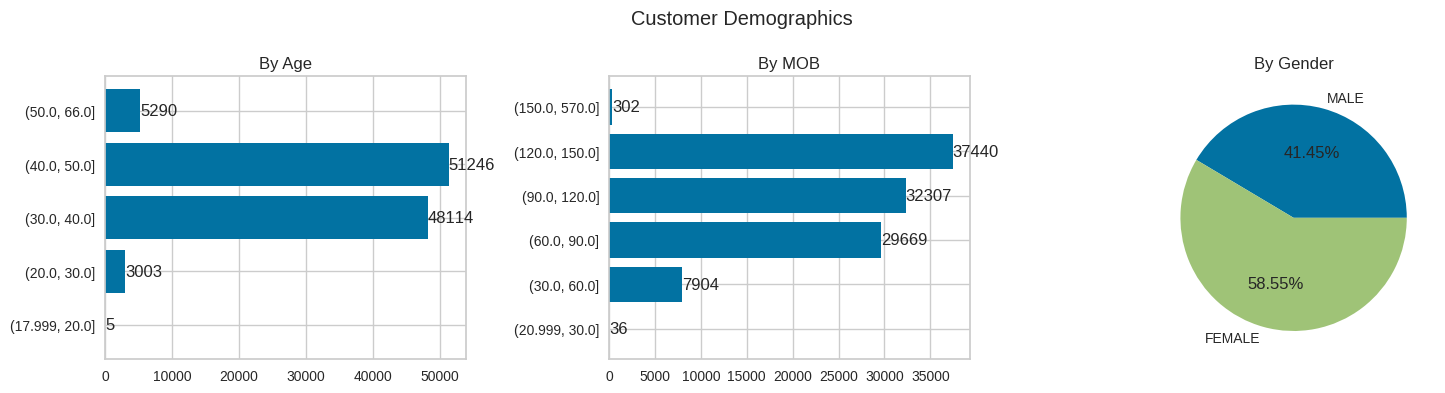

In [ ]:
fig = plt.figure(figsize=(15,4))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,3)
ax3 = fig.add_subplot(1,3,2)

#chart 1
df_age_group = df_bank_promotion_eda.groupby(['AGE_GROUP'], as_index = False)['ACCOUNT_ID'].count()
df_age_group['AGE_GROUP'] = df_age_group['AGE_GROUP'].astype(str)
ax1_container = ax1.barh(df_age_group['AGE_GROUP'], df_age_group['ACCOUNT_ID'])
ax1.bar_label(ax1_container)
ax1.set_title('By Age')

#chart 2
df_gender_group = df_bank_promotion_eda.groupby(['FLAG_FEMALE'], as_index = False)['ACCOUNT_ID'].count()
df_gender_group['GENDER'] = df_gender_group['FLAG_FEMALE'].apply(lambda x: 'FEMALE' if x == 1 else 'MALE')
ax2.pie(df_gender_group['ACCOUNT_ID'], labels = df_gender_group['GENDER'], autopct='%.2f%%')
ax2.set_title('By Gender')

#chart 3
df_mob_group = df_bank_promotion_eda.groupby(['MOB_GROUP'], as_index = False)['ACCOUNT_ID'].count()
df_mob_group['MOB_GROUP'] = df_mob_group['MOB_GROUP'].astype(str)
ax3_container = ax3.barh(df_mob_group['MOB_GROUP'], df_mob_group['ACCOUNT_ID'])
ax3.bar_label(ax3_container)
ax3.set_title('By MOB')

# Set figure's title
fig.suptitle("Customer Demographics")

plt.tight_layout()

##3) How much total sales have been generated in Revoshop over the past 6 months ?
(Hint: Total sales can be calculated by multiplying the average transaction amount by the number of transactions)

In [ ]:
df_bank_promotion_eda['TOTAL_SALES_L6M'] = df_bank_promotion_eda['AVG_TXN_AMT_L6M'] * df_bank_promotion_eda['TXN_CNT_L6M']
df_bank_promotion_eda['TOTAL_SALES_L6M'].sum()

56639218.9

€ 56,639,218.9

##4) How much total sales were made in response to the promo in last 6 months ?
(Hint: use columns that indicate average promo transactions and the number of promo transactions)

In [ ]:
df_bank_promotion_eda['TOTAL_PROMO_SALES_L6M'] = df_bank_promotion_eda['AVG_PROMO_TXN_AMT_L6M'] * df_bank_promotion_eda['PROMO_TXN_CNT_L6M']
df_bank_promotion_eda['TOTAL_PROMO_SALES_L6M'].sum()

35208915.89999999

€ 35,208,915.9

##5) What percentage of total sales at RevoShop is attributed to promo ?
(Hint: divide the result from part d by result from part c for the last 6 months. Repeat the calculation for lifetime sales and compare the two results

In [ ]:
promo_percentage_l6m = round(df_bank_promotion_eda['TOTAL_PROMO_SALES_L6M'].sum() / df_bank_promotion_eda['TOTAL_SALES_L6M'].sum() * 100, 2)
print(promo_percentage_l6m)

62.16


In [ ]:
df_bank_promotion_eda['TOTAL_SALES_LTM'] = df_bank_promotion_eda['AVG_TXN_AMT_LTM'] * df_bank_promotion_eda['TXN_CNT_LTM']
df_bank_promotion_eda['TOTAL_PROMO_SALES_LTM'] = df_bank_promotion_eda['AVG_PROMO_TXN_AMT_LTM'] * df_bank_promotion_eda['PROMO_TXN_CNT_LTM']

promo_percentage_ltm = round(df_bank_promotion_eda['TOTAL_PROMO_SALES_LTM'].sum() / df_bank_promotion_eda['TOTAL_SALES_LTM'].sum() * 100, 2)
print(promo_percentage_ltm)



58.88


*   62.16% for last 6 months sales
*   58.88 for the lifetime sales

Percentage of total sales that attributed to promo for the last 6 months is slightly higher than the lifetime sales promo percentage




##6) What is the average number of transaction per customer in their lifetime and over the last 6 months ?
(Hint: add up the transaction counts for the last 6 months and divide by total number of customers. Repeat the same process for lifetime and compare the result)


In [ ]:
print(df_bank_promotion_eda['TXN_CNT_L6M'].mean())
print(df_bank_promotion_eda['TXN_CNT_L6M'].sum()/df_bank_promotion_eda['ACCOUNT_ID'].count())

4.524484943060432
4.524484943060432


In [ ]:
print(df_bank_promotion_eda['TXN_CNT_LTM'].mean())
print(df_bank_promotion_eda['TXN_CNT_LTM'].sum()/df_bank_promotion_eda['ACCOUNT_ID'].count())

20.158074643779376
20.158074643779376


In [ ]:
print(df_bank_promotion_eda['PROMO_TXN_CNT_L6M'].mean())
print(df_bank_promotion_eda['PROMO_TXN_CNT_L6M'].sum()/df_bank_promotion_eda['ACCOUNT_ID'].count())

2.824379052183767
2.824379052183767


In [ ]:
print(df_bank_promotion_eda['PROMO_TXN_CNT_LTM'].mean())
print(df_bank_promotion_eda['PROMO_TXN_CNT_LTM'].sum()/df_bank_promotion_eda['ACCOUNT_ID'].count())

10.366438165301231
10.366438165301231


All transactions:
*   For last 6 months sales: 4.5 transactions
*   For the lifetime sales: 20 transactions

Promo transactions:
*   For last 6 months sales: 2.8 transactions
*   For the lifetime sales: 10.3 transactions

 Number of transaction per customer in the lifetime is higher than number of transaction per customer over the last 6 months

##7) What is the total cost of promotion of the last 6 months ?
(Hint: total promo cost can be calculated as the number of promo transactions multiplied by 1.5 euro per transaction)

In [ ]:
# print(df_bank_promotion_eda['PROMO_TXN_CNT_L6M'].sum())
# promotion_cost_l6m = df_bank_promotion_eda['PROMO_TXN_CNT_L6M'].sum() * 1.5
# print(promotion_cost_l6m)
df_bank_promotion_eda['PROMOTION_COST_L6M'] = df_bank_promotion_eda['PROMO_TXN_CNT_L6M'] * 1.5
df_bank_promotion_eda['PROMOTION_COST_L6M'].sum()

456100.5

€ 456,100.5

##8) What is the total revenue generated by the promo in the last 6 months ?
(Hint: Total revenue can be calculated by multiplying the total sales by 2.4%)


In [ ]:
#print(df_bank_promotion_eda['TOTAL_PROMO_SALES_L6M'].sum())
# promo_revenue_l6m = df_bank_promotion_eda['TOTAL_PROMO_SALES_L6M'].sum() * 0.024
# print(promo_revenue_l6m)
df_bank_promotion_eda['PROMO_REVENUE_L6M'] = df_bank_promotion_eda['TOTAL_PROMO_SALES_L6M'] * 0.024
df_bank_promotion_eda['PROMO_REVENUE_L6M'].sum()

845013.9815999999

€ 845,014

##9) How many customers are considered as promo sensitive ?
(Hint: a customer is promo sensitive if more than 50% of their total sales in RevoShop are attributed to promo)

In [ ]:
df_bank_promotion_eda['PROMO_PERCENTAGE'] = df_bank_promotion_eda['TOTAL_PROMO_SALES_LTM'] / df_bank_promotion_eda['TOTAL_SALES_LTM']
df_bank_promotion_eda['PROMO_SENSITIVE'] = df_bank_promotion_eda['PROMO_PERCENTAGE'].apply(lambda x: 1 if x > 0.5 else 0)

In [ ]:
df_bank_promotion_eda['PROMO_SENSITIVE'].value_counts()

1    73461
0    34197
Name: PROMO_SENSITIVE, dtype: int64

*   73,461 (68,23%) customers are Promo Sensitive
*   34,197 (31,76%) customers are not Promo Sensitive



#TRENDS

###1) Is there any difference in transaction behavior and promo sensitivity between active and inactive customer in the past 6 months ?
(Hint: compare the number of customers, promo sensitive customers, average transaction amount, and average transaction count per customer for each customer group)

**notes MAPP_ACTIVE_GROUP:
- X: High activity in mobile app
- Y: Average activity
- Z: Low activity

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_active_customer_group = df_bank_promotion_eda.groupby(['MAPP_ACTIVE_GROUP']).agg(
    num_of_customers = ('ACCOUNT_ID', 'count'),
    num_of_promo_sensitive = ('PROMO_SENSITIVE', 'sum'),
    avg_total_sales_l6m = ('TOTAL_SALES_L6M', 'mean'),
    avg_txn_cnt_l6m = ('TXN_CNT_L6M', 'mean'),
    avg_total_promo_sales_l6m = ('TOTAL_PROMO_SALES_L6M', 'mean'),
    avg_promo_txn_cnt_l6m = ('PROMO_TXN_CNT_L6M', 'mean'))

df_active_customer_group['pct_promo_sensitive'] = df_active_customer_group['num_of_promo_sensitive'] / df_active_customer_group['num_of_customers'] * 100
df_active_customer_group['pct_avg_total_promo_sales_l6m'] = df_active_customer_group['avg_total_promo_sales_l6m'] / df_active_customer_group['avg_total_sales_l6m'] * 100

df_active_customer_group = df_active_customer_group.reset_index()
df_active_customer_group

,MAPP_ACTIVE_GROUP,num_of_customers,num_of_promo_sensitive,avg_total_sales_l6m,avg_txn_cnt_l6m,avg_total_promo_sales_l6m,avg_promo_txn_cnt_l6m,pct_promo_sensitive,pct_avg_total_promo_sales_l6m
0,X,100141,68384,527.06,4.54,327.57,2.83,68.29,62.15
1,Y,7036,4911,503.67,4.25,316.68,2.69,69.80,62.87
2,Z,481,166,654.18,5.20,369.50,2.89,34.51,56.48


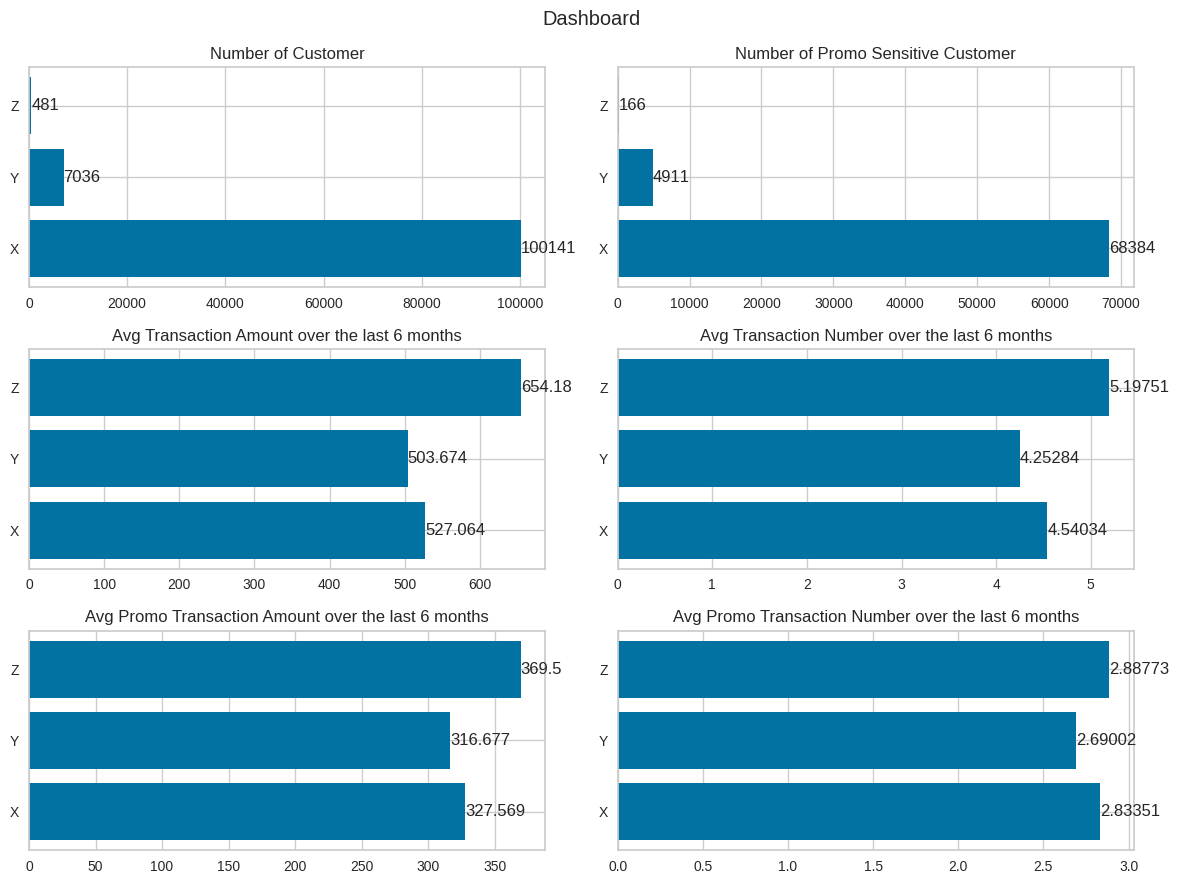

In [ ]:
fig = plt.figure(figsize=(12,9))

ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

#chart 1
ax1_container = ax1.barh(df_active_customer_group['MAPP_ACTIVE_GROUP'], df_active_customer_group['num_of_customers'])
ax1.bar_label(ax1_container)
ax1.set_title('Number of Customer')

#chart 2
ax2_container = ax2.barh(df_active_customer_group['MAPP_ACTIVE_GROUP'], df_active_customer_group['num_of_promo_sensitive'])
ax2.bar_label(ax2_container)
ax2.set_title('Number of Promo Sensitive Customer')

#chart 3
ax3_container = ax3.barh(df_active_customer_group['MAPP_ACTIVE_GROUP'], df_active_customer_group['avg_total_sales_l6m'])
ax3.bar_label(ax3_container)
ax3.set_title('Avg Transaction Amount over the last 6 months')

#chart 4
ax4_container = ax4.barh(df_active_customer_group['MAPP_ACTIVE_GROUP'], df_active_customer_group['avg_txn_cnt_l6m'])
ax4.bar_label(ax4_container)
ax4.set_title('Avg Transaction Number over the last 6 months')

#chart 5
ax5_container = ax5.barh(df_active_customer_group['MAPP_ACTIVE_GROUP'], df_active_customer_group['avg_total_promo_sales_l6m'])
ax5.bar_label(ax5_container)
ax5.set_title('Avg Promo Transaction Amount over the last 6 months')

#chart 6
ax6_container = ax6.barh(df_active_customer_group['MAPP_ACTIVE_GROUP'], df_active_customer_group['avg_promo_txn_cnt_l6m'])
ax6.bar_label(ax6_container)
ax6.set_title('Avg Promo Transaction Number over the last 6 months')

# Set figure's title
fig.suptitle("Dashboard")

plt.tight_layout()

Insights:
1.   93% of RevoShop customers are High activity customers
2.   Around 70% of High and Average activity customers are Promo Sensitive customers, while only 35% of Low activity customers are Promo Sensitive customers
3.   'Average total sales' and 'Average number transaction' of Low activity customers is higher than High and Average activity customers
4.   'Average total promo sales' of Low activity customers is higher than High and Average activity customers
5.   All High, Average and Low activity customers has almost same 'Average number promo transaction'
6.   Ratio of 'Average total promo sales' and 'Average total sales' of the Low activity customers is 56%, the ratio is lower compare to High and Average activity customers at 60%
7.   Low activity customers is less sensitive to promo, but the number of customer and sales is very small compared to High and Average activity customers






###2) Is there are difference in transaction behavior and promo sensitivity between high and lower value customer in the past 6 months ?
(Hint: compare the number of customers, promo sensitive customers, average transaction amount, and average transaction count per customer for each customer group)

**note 'CUST_VALUE_GROUP': of A is the most profitable and creditworthy customers, while E is the lowest customers

In [ ]:
df_customer_value_group = df_bank_promotion_eda.groupby(['CUST_VALUE_GROUP']).agg(
    num_of_customers = ('ACCOUNT_ID', 'count'),
    num_of_promo_sensitive = ('PROMO_SENSITIVE', 'sum'),
    avg_total_sales_l6m = ('TOTAL_SALES_L6M', 'mean'),
    avg_txn_cnt_l6m = ('TXN_CNT_L6M', 'mean'),
    avg_total_promo_sales_l6m = ('TOTAL_PROMO_SALES_L6M', 'mean'),
    avg_promo_txn_cnt_l6m = ('PROMO_TXN_CNT_L6M', 'mean'))

df_customer_value_group['pct_promo_sensitive'] = df_customer_value_group['num_of_promo_sensitive'] / df_customer_value_group['num_of_customers'] * 100
df_customer_value_group['pct_avg_total_promo_sales_l6m'] = df_customer_value_group['avg_total_promo_sales_l6m'] / df_customer_value_group['avg_total_sales_l6m'] * 100

df_customer_value_group = df_customer_value_group.reset_index()
df_customer_value_group

,CUST_VALUE_GROUP,num_of_customers,num_of_promo_sensitive,avg_total_sales_l6m,avg_txn_cnt_l6m,avg_total_promo_sales_l6m,avg_promo_txn_cnt_l6m,pct_promo_sensitive,pct_avg_total_promo_sales_l6m
0,A,16389,10502,558.06,4.23,358.02,2.71,64.08,64.15
1,B,16997,11690,526.31,4.36,329.39,2.73,68.78,62.58
2,C,17734,12173,524.02,4.53,325.07,2.84,68.64,62.03
3,D,12001,8125,531.80,4.59,331.28,2.87,67.70,62.29
4,E,44537,30971,513.56,4.68,314.40,2.88,69.54,61.22


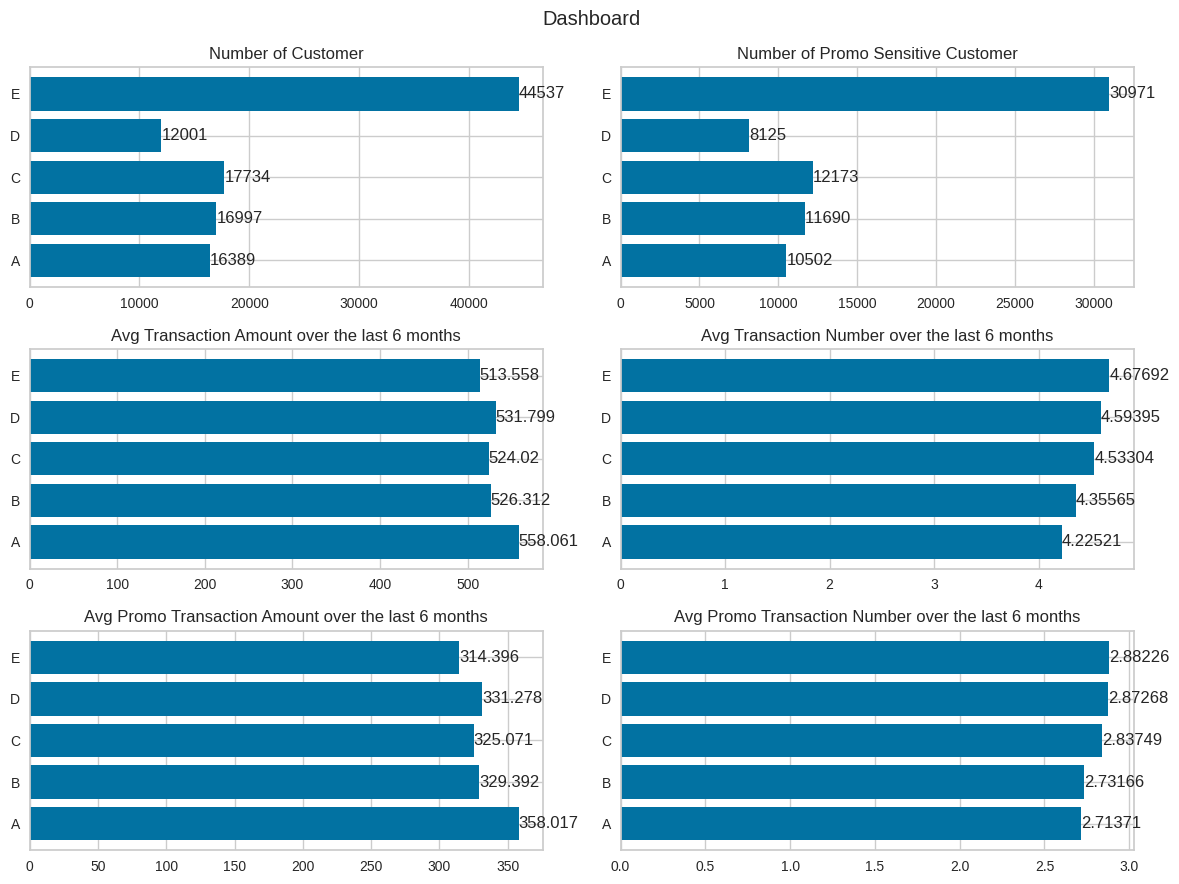

In [ ]:
fig = plt.figure(figsize=(12,9))

ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

#chart 1
ax1_container = ax1.barh(df_customer_value_group['CUST_VALUE_GROUP'], df_customer_value_group['num_of_customers'])
ax1.bar_label(ax1_container)
ax1.set_title('Number of Customer')

#chart 2
ax2_container = ax2.barh(df_customer_value_group['CUST_VALUE_GROUP'], df_customer_value_group['num_of_promo_sensitive'])
ax2.bar_label(ax2_container)
ax2.set_title('Number of Promo Sensitive Customer')

#chart 3
ax3_container = ax3.barh(df_customer_value_group['CUST_VALUE_GROUP'], df_customer_value_group['avg_total_sales_l6m'])
ax3.bar_label(ax3_container)
ax3.set_title('Avg Transaction Amount over the last 6 months')

#chart 4
ax4_container = ax4.barh(df_customer_value_group['CUST_VALUE_GROUP'], df_customer_value_group['avg_txn_cnt_l6m'])
ax4.bar_label(ax4_container)
ax4.set_title('Avg Transaction Number over the last 6 months')

#chart 5
ax5_container = ax5.barh(df_customer_value_group['CUST_VALUE_GROUP'], df_customer_value_group['avg_total_promo_sales_l6m'])
ax5.bar_label(ax5_container)
ax5.set_title('Avg Promo Transaction Amount over the last 6 months')

#chart 6
ax6_container = ax6.barh(df_customer_value_group['CUST_VALUE_GROUP'], df_customer_value_group['avg_promo_txn_cnt_l6m'])
ax6.bar_label(ax6_container)
ax6.set_title('Avg Promo Transaction Number over the last 6 months')

# Set figure's title
fig.suptitle("Dashboard")

plt.tight_layout()

Insights:
1.   Value E customers is around 30% of total customer and is the biggest group compared to other Customer value groups
2.   Percentage of promo sensitive customer in every Customer Value group is only slightly  different, the highest percentage is Value E customer at 69% and the lowest is Value A customer at 64%
3.   Average total sales of each customer in Value A customer group is the highest at 558 and the lowest is Value E customer group at 513
4.   Average number transaction of every customer group is only slightly different, the highest transaction is Value E customer at 4,68 and the lowest is Value A customer at 4,22
5.   Average total promo sales of each customer in Value A customer group is the highest at 358 and the lowest is Value E customer group at 314
6.   Average number promo transaction of every customer group is only slightly different, the highest transaction is Value E customer at 2,88 and the lowest is Value A customer at 2,71
7.   Percentage of 'Average total promo sales' and 'Average total sales' in every Customer Value group is only slightly different, the highest percentage is Value A customer at 64% and the lowest is Value E customer at 61%


###3) Is there a relationship between increasing the number of email and sms message and improved sales performance ?
(Hint: Group the data by promo communication count and calculate the average sales per customer in each group)

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_promotion_num_group = df_bank_promotion_eda.groupby(['CNT_PROMO_L6M']).agg(
    num_of_customers = ('ACCOUNT_ID', 'count'),
    num_of_promo_sensitive = ('PROMO_SENSITIVE', 'sum'),
    avg_total_sales_l6m = ('TOTAL_SALES_L6M', 'mean'),
    avg_txn_cnt_l6m = ('TXN_CNT_L6M', 'mean'),
    avg_total_promo_sales_l6m = ('TOTAL_PROMO_SALES_L6M', 'mean'),
    avg_promo_txn_cnt_l6m = ('PROMO_TXN_CNT_L6M', 'mean'))

df_promotion_num_group['pct_promo_sensitive'] = df_promotion_num_group['num_of_promo_sensitive'] / df_promotion_num_group['num_of_customers'] * 100
df_promotion_num_group['pct_avg_total_promo_sales_l6m'] = df_promotion_num_group['avg_total_promo_sales_l6m'] / df_promotion_num_group['avg_total_sales_l6m'] * 100

df_promotion_num_group = df_promotion_num_group.reset_index()
df_promotion_num_group

,CNT_PROMO_L6M,num_of_customers,num_of_promo_sensitive,avg_total_sales_l6m,avg_txn_cnt_l6m,avg_total_promo_sales_l6m,avg_promo_txn_cnt_l6m,pct_promo_sensitive,pct_avg_total_promo_sales_l6m
0,0.00,56,27,271.86,3.02,133.93,1.59,48.21,49.26
1,1.00,306,228,381.36,3.36,241.68,2.15,74.51,63.37
2,2.00,1223,922,318.51,2.90,211.24,1.93,75.39,66.32
3,3.00,2932,1983,321.24,3.41,196.06,2.08,67.63,61.03
4,4.00,10458,7435,362.94,3.56,222.07,2.20,71.09,61.19
5,5.00,25484,17927,425.78,4.16,263.67,2.60,70.35,61.93
6,6.00,47795,32738,570.85,4.77,348.94,2.94,68.50,61.13
7,7.00,13555,9428,679.29,5.35,450.26,3.55,69.55,66.28
8,8.00,2209,1076,583.84,3.85,379.68,2.44,48.71,65.03
9,9.00,1124,464,661.22,4.44,417.52,2.69,41.28,63.14


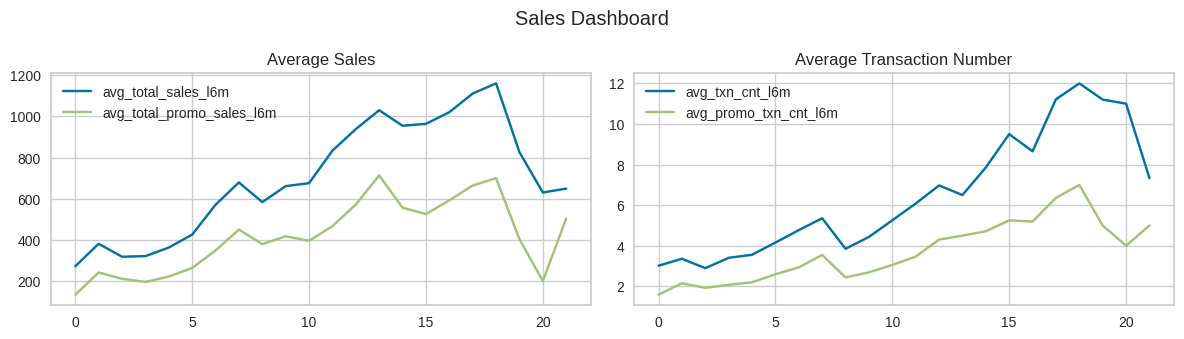

In [ ]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

#chart 1
ax1.plot(df_promotion_num_group['CNT_PROMO_L6M'], df_promotion_num_group['avg_total_sales_l6m'])
ax1.plot(df_promotion_num_group['CNT_PROMO_L6M'], df_promotion_num_group['avg_total_promo_sales_l6m'])
ax1.legend(['avg_total_sales_l6m', 'avg_total_promo_sales_l6m'])
ax1.set_title('Average Sales')

#chart 2
ax2.plot(df_promotion_num_group['CNT_PROMO_L6M'], df_promotion_num_group['avg_txn_cnt_l6m'])
ax2.plot(df_promotion_num_group['CNT_PROMO_L6M'], df_promotion_num_group['avg_promo_txn_cnt_l6m'])
ax2.legend(['avg_txn_cnt_l6m', 'avg_promo_txn_cnt_l6m'])
ax2.set_title('Average Transaction Number')

# Set figure's title
fig.suptitle("Sales Dashboard")

plt.tight_layout()

Based on the chart we can see that in the last 6 months promo campaign, Customers that got more promo email and sms message are having higher Average Sales Amount and Average Transaction Number

<Axes: xlabel='CNT_PROMO_L6M', ylabel='TOTAL_SALES_L6M'>

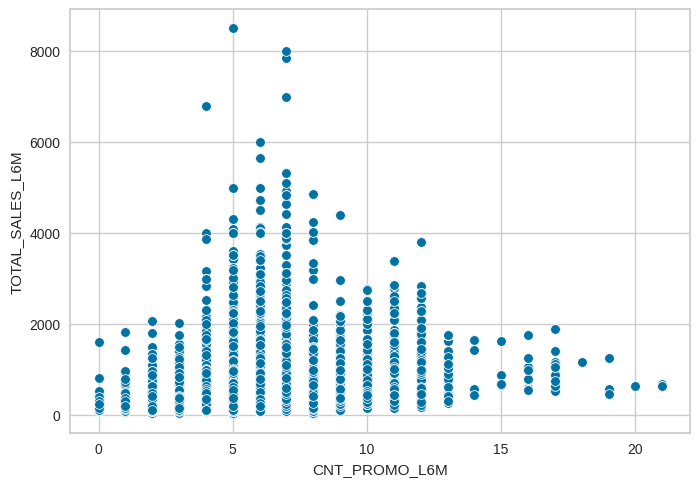

In [ ]:
sns.scatterplot(x=df_bank_promotion_eda['CNT_PROMO_L6M'], y=df_bank_promotion_eda['TOTAL_SALES_L6M'])

In [ ]:
df_bank_promotion_eda[['CNT_PROMO_L6M','TOTAL_SALES_L6M']].corr()

,CNT_PROMO_L6M,TOTAL_SALES_L6M
CNT_PROMO_L6M,1.00,0.27
TOTAL_SALES_L6M,0.27,1.00


There are low positive correlation between the two variable with r = 0.27

#Customer Segmentation

Requirement:
Identify the segments that have higher average sales per client, higher average transaction per client, higher revenue generated, and/or larger proportion of promo sensitive clients compared to others

Reason to use k-means method:
Because based on the requirement we will create a cluster that focus on the average sales per client, average transaction per client, higher revenue generated and proportion of promo sensitive clients


In [ ]:
df_cluster = df_bank_promotion_eda.copy()
df_cluster = df_cluster.set_index('ACCOUNT_ID')
df_cluster = df_cluster.select_dtypes(include='number').copy()
df_cluster

,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,CNT_PROMO_L6M,...,PROMO_CHANNEL,PROMO_SENSITIVE,AGE,TOTAL_SALES_L6M,TOTAL_PROMO_SALES_L6M,TOTAL_SALES_LTM,TOTAL_PROMO_SALES_LTM,PROMOTION_COST_L6M,PROMO_REVENUE_L6M,PROMO_PERCENTAGE
ACCOUNT_ID,,,,,,,,,,,,,,,,,,,,,
100000004,216.00,201.00,200.00,250.00,5.00,21.00,2.00,7.00,15.00,9.00,...,0,0,48,1080.00,400.00,4221.00,1750.00,3.00,9.60,0.41
100000008,143.30,114.10,140.00,150.00,3.00,22.00,2.00,10.00,20.00,8.00,...,0,1,32,429.90,280.00,2510.20,1500.00,3.00,6.72,0.60
100000012,263.30,242.70,400.00,290.00,4.00,12.00,2.00,4.00,16.00,12.00,...,0,0,53,1053.20,800.00,2912.40,1160.00,3.00,19.20,0.40
100000014,235.60,210.00,242.90,300.00,8.00,27.00,6.00,13.00,20.00,9.00,...,1,1,40,1884.80,1457.40,5670.00,3900.00,9.00,34.98,0.69
100000015,98.00,77.50,97.50,90.00,5.00,44.00,4.00,21.00,25.00,8.00,...,0,1,34,490.00,390.00,3410.00,1890.00,6.00,9.36,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101059832,100.00,84.20,100.00,100.00,2.00,12.00,2.00,5.00,4.00,6.00,...,1,0,44,200.00,200.00,1010.40,500.00,3.00,4.80,0.49
101059843,120.00,113.40,120.00,200.00,3.00,22.00,1.00,5.00,8.00,4.00,...,0,0,30,360.00,120.00,2494.80,1000.00,1.50,2.88,0.40
101059857,52.90,36.80,46.70,70.00,7.00,28.00,3.00,12.00,19.00,5.00,...,1,1,43,370.30,140.10,1030.40,840.00,4.50,3.36,0.82


In [ ]:
df_cluster.columns

Index(['AVG_TXN_AMT_L6M', 'AVG_TXN_AMT_LTM', 'AVG_PROMO_TXN_AMT_L6M',
       'AVG_PROMO_TXN_AMT_LTM', 'TXN_CNT_L6M', 'TXN_CNT_LTM',
       'PROMO_TXN_CNT_L6M', 'PROMO_TXN_CNT_LTM', 'LAST_TXN_DAY',
       'CNT_PROMO_L6M', 'CNT_PROMO_L12M', 'HOMEOWNER_STATUS', 'HOME_VALUE',
       'PROXY_INCOME', 'PCT_INCOME_RETIREMENT', 'MOB', 'FLAG_FEMALE',
       'PROMO_CHANNEL', 'PROMO_SENSITIVE', 'AGE', 'TOTAL_SALES_L6M',
       'TOTAL_PROMO_SALES_L6M', 'TOTAL_SALES_LTM', 'TOTAL_PROMO_SALES_LTM',
       'PROMO_PERCENTAGE'],
      dtype='object')

##Choosing feature

Based on the requirement we should focus on:
*   average sales per client use column TOTAL_SALES_LTM
*   average transaction per client use column TXN_CNT_LTM
*   higher revenue generated use column TOTAL_SALES_LTM because revenue is calculated based on 2.4% off total sales
*   proportion of promo sensitive clients use column PROMO_PERCENTAGE instead of PROMO_SENSITIVE to get detail ratio number of PROMO transaction compare to TOTAL transaction

In [ ]:
df_cluster_feature = df_cluster[['TOTAL_SALES_LTM', 'TXN_CNT_LTM', 'PROMO_PERCENTAGE']]
df_cluster_feature

,TOTAL_SALES_LTM,TXN_CNT_LTM,PROMO_PERCENTAGE
ACCOUNT_ID,,,
100000004,4221.00,21.00,0.41
100000008,2510.20,22.00,0.60
100000012,2912.40,12.00,0.40
100000014,5670.00,27.00,0.69
100000015,3410.00,44.00,0.55
...,...,...,...
101059832,1010.40,12.00,0.49
101059843,2494.80,22.00,0.40
101059857,1030.40,28.00,0.82


##Check Data Distribution

In [ ]:
df_cluster_feature.describe()

,TOTAL_SALES_LTM,TXN_CNT_LTM,PROMO_PERCENTAGE
count,107658.00,107658.00,107658.00
mean,2058.79,20.16,0.60
std,1555.23,8.96,0.19
min,262.50,3.00,0.02
25%,1210.00,14.00,0.46
50%,1659.20,18.00,0.60
75%,2430.40,24.00,0.75
max,52751.00,127.00,1.00


###Outlier

<Axes: xlabel='TOTAL_SALES_LTM'>

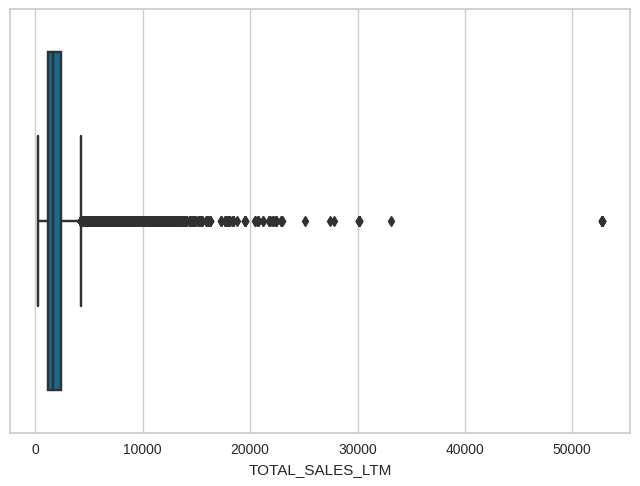

In [ ]:
sns.boxplot(data = df_cluster_feature , x ="TOTAL_SALES_LTM")

<Axes: xlabel='TXN_CNT_LTM'>

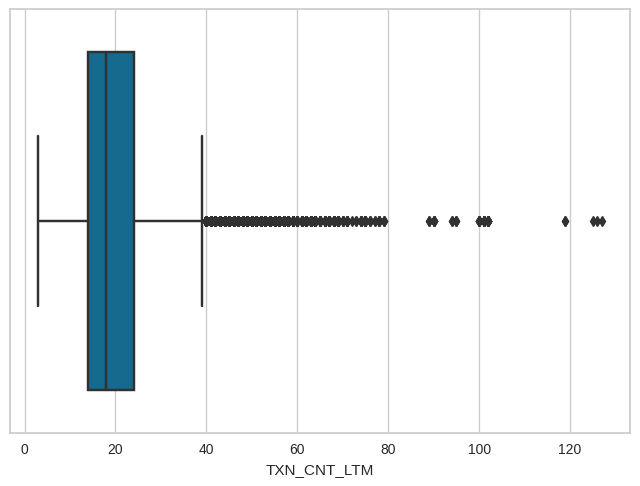

In [ ]:
sns.boxplot(data = df_cluster_feature , x ="TXN_CNT_LTM")

<Axes: xlabel='PROMO_PERCENTAGE'>

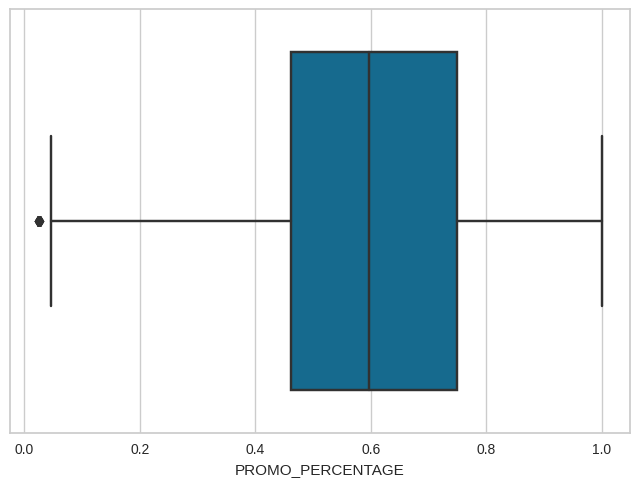

In [ ]:
sns.boxplot(data = df_cluster_feature , x ="PROMO_PERCENTAGE")

In [ ]:
#Check the Q1,Q3,IQR,UB & LB
column1name = 'TOTAL_SALES_LTM'

print(f'Outlier Detection "{column1name}":\n')
ainc_Q1 = df_cluster_feature[column1name].quantile(0.25)
print("Q1 =",ainc_Q1)

ainc_Q3 = df_cluster_feature[column1name].quantile(0.75)
print("Q3 =",ainc_Q3)

ainc_IQR = ainc_Q3 - ainc_Q1
print("IQR =",ainc_IQR)

ainc_LB = ainc_Q1-1.5*ainc_IQR
print("LB =",ainc_LB)

ainc_UB = ainc_Q3+1.5*ainc_IQR
print("UB =",ainc_UB)


#------------------------------------------
column2name = 'TXN_CNT_LTM'
print(f'\nOutlier Detection "{column2name}":\n')
lamnt_Q1 = df_cluster_feature[column2name].quantile(0.25)
print("Q1 =",lamnt_Q1)

lamnt_Q3 = df_cluster_feature[column2name].quantile(0.75)
print("Q3 =",lamnt_Q3)

lamnt_IQR = lamnt_Q3 - lamnt_Q1
print("IQR =",lamnt_IQR)

lamnt_LB = lamnt_Q1-1.5*lamnt_IQR
print("LB =",lamnt_LB)

lamnt_UB = lamnt_Q3+1.5*lamnt_IQR
print("UB =",lamnt_UB)

Outlier Detection "TOTAL_SALES_LTM":

Q1 = 1210.0
Q3 = 2430.4
IQR = 1220.4
LB = -620.6000000000001
UB = 4261.0

Outlier Detection "TXN_CNT_LTM":

Q1 = 14.0
Q3 = 24.0
IQR = 10.0
LB = -1.0
UB = 39.0


In [ ]:
df_cluster_feature[df_cluster_feature['TOTAL_SALES_LTM'] > 4300]

,TOTAL_SALES_LTM,TXN_CNT_LTM,PROMO_PERCENTAGE
ACCOUNT_ID,,,
100000014,5670.00,27.00,0.69
100000027,7659.00,46.00,0.37
100000042,6558.60,34.00,0.54
100000145,4540.80,32.00,0.46
100000181,11332.00,40.00,0.71
...,...,...,...
101059054,5610.00,33.00,0.61
101059235,6246.40,32.00,0.38
101059256,6689.80,31.00,0.54


In [ ]:
df_cluster_feature[df_cluster_feature['TXN_CNT_LTM'] > 39]

,TOTAL_SALES_LTM,TXN_CNT_LTM,PROMO_PERCENTAGE
ACCOUNT_ID,,,
100000015,3410.00,44.00,0.55
100000027,7659.00,46.00,0.37
100000181,11332.00,40.00,0.71
100000182,2480.50,41.00,0.38
100000204,5888.00,46.00,0.39
...,...,...,...
101058914,2763.20,44.00,0.36
101059108,1294.30,43.00,0.93
101059450,7353.50,55.00,0.39


In [ ]:
print(4793/107658)

0.044520611566256106


Insight:
*   6160 / 5.7% rows of outlier in TOTAL_SALES_LTM column
*   4793 / 4.5% rows of outlier in TXN_CNT_LTM column

###No Scale

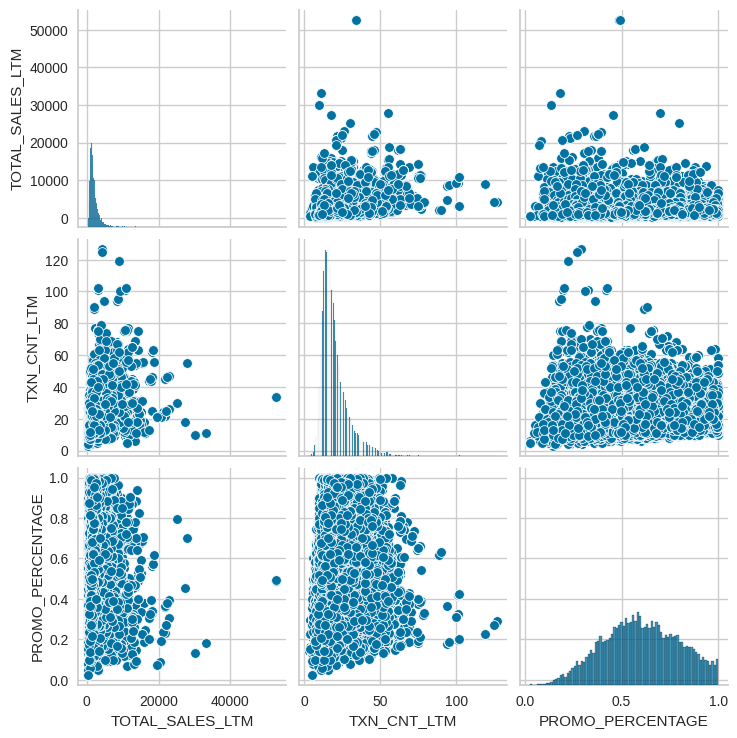

In [ ]:
sns.pairplot(df_cluster_feature)

###Standard Scaler

In [ ]:
# Define Standard Scale dataset
standard_scale_df = df_cluster_feature.copy()
#column = ['annual_inc','loan_amnt']
column = standard_scale_df.columns.tolist()
# using StandardScaler Scaler
ss_scaler = StandardScaler()
standard_scale_df[column] = ss_scaler.fit_transform(standard_scale_df[column])

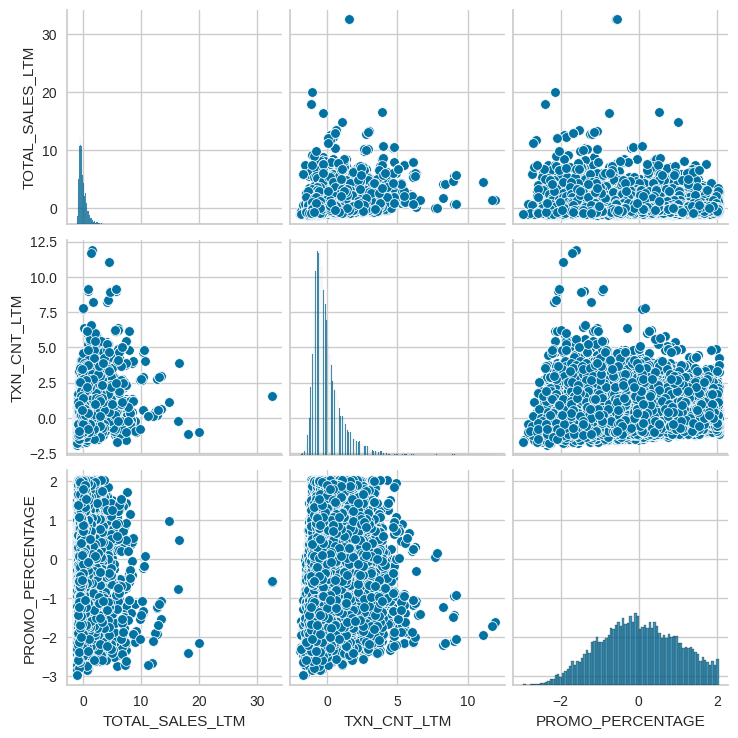

In [ ]:
sns.pairplot(standard_scale_df)

###Robust Scaler

In [ ]:
# Define Robust Scale dataset
robust_scale_df = df_cluster_feature.copy()
column = df_cluster_feature.columns.to_list()
# using RobustScaler Scaler
rs_scaler = RobustScaler()
robust_scale_df[column] = rs_scaler.fit_transform(robust_scale_df[column])

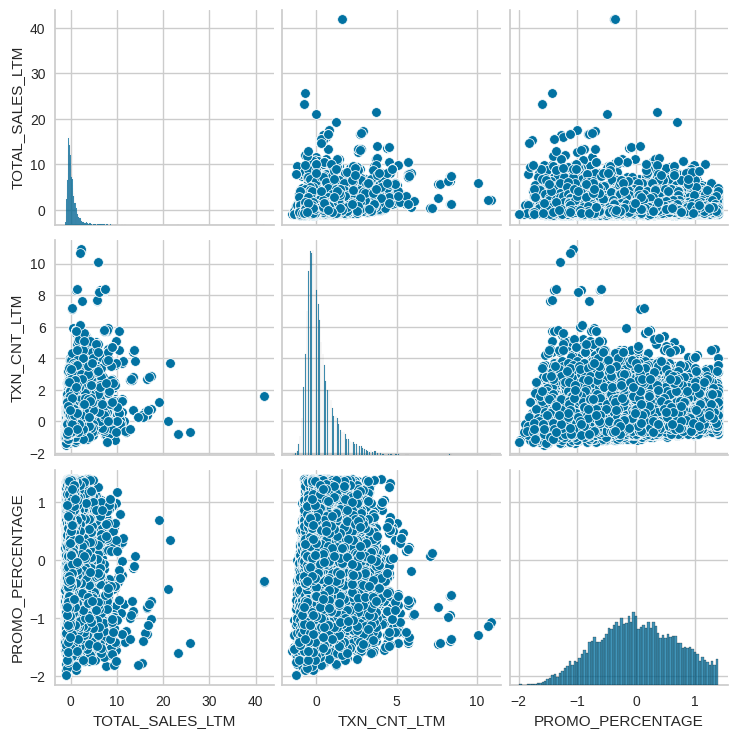

In [ ]:
sns.pairplot(robust_scale_df)

###MinMax Scaler

In [ ]:
# Define Minmax Scale dataset
minmax_scale_df = df_cluster_feature.copy()
column = df_cluster_feature.columns.to_list()
# using Minmax Scaler
mm_scaler = MinMaxScaler()
minmax_scale_df[column] = mm_scaler.fit_transform(minmax_scale_df[column])

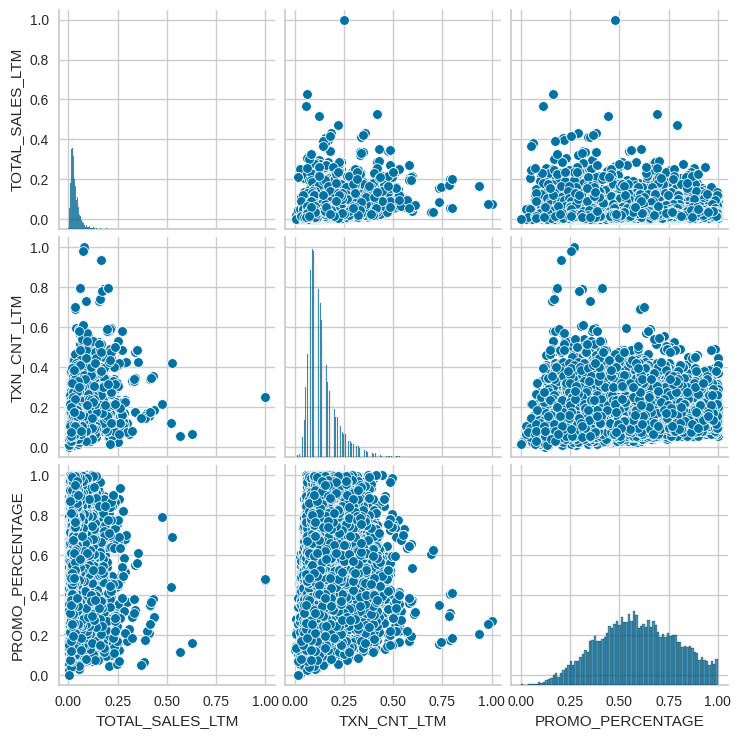

In [ ]:
sns.pairplot(minmax_scale_df)

###Choose Scaler

In [ ]:
#df_after_scale = minmax_scale_df
#df_after_scale = standard_scale_df
df_after_scale = robust_scale_df

Decide to use Robust Scaler because high number of outlier in data
*   6,160 (5.7%) rows of outlier in TOTAL_SALES_LTM column
*   4,793 (4.5%) rows of outlier in TXN_CNT_LTM column

Having more than 5% of your data classified as outliers can potentially impact the performance and results of K-means clustering. K-means is a distance-based clustering algorithm, and outliers can significantly influence the clustering process due to their extreme values



##Cluster

###Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

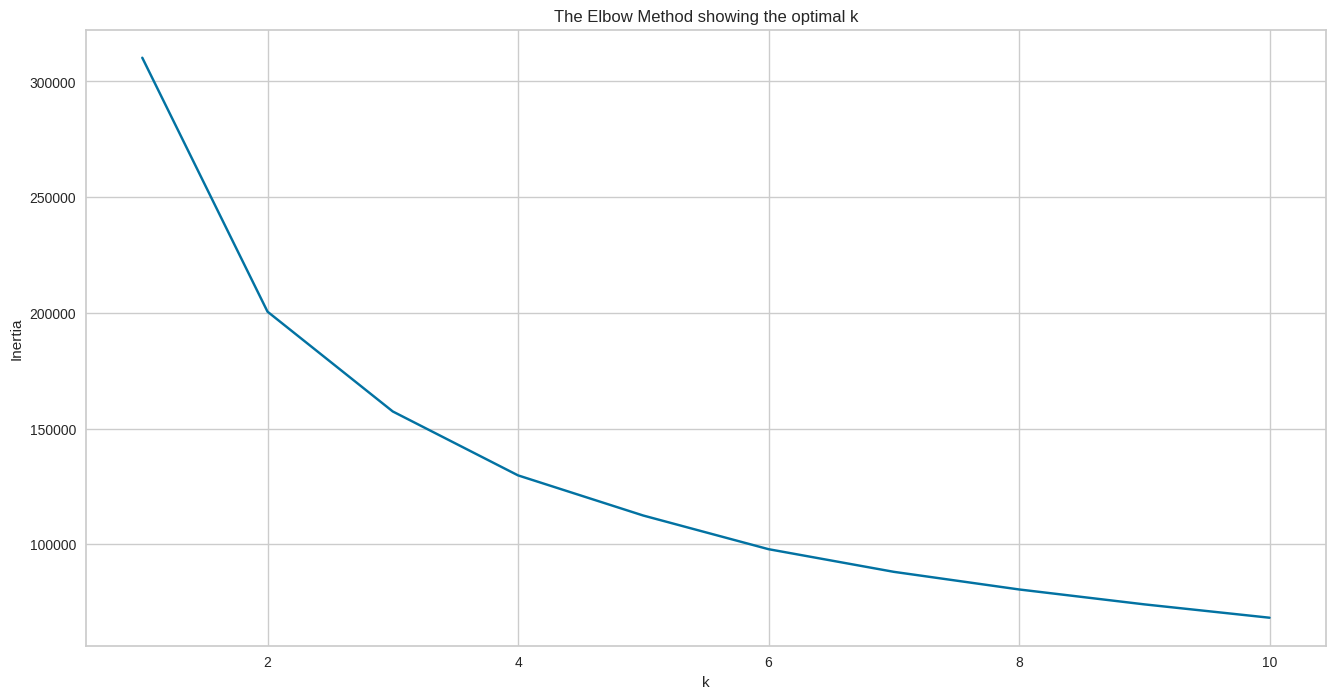

[310225.7387201991, 200524.98042400673, 157412.07460902602, 129803.58370202227, 112453.46742213127, 97917.38750232232, 88135.43363272274, 80521.81941713911, 74083.21054659129, 68308.4146145627]


In [ ]:
# K-Means Clustering
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(df_after_scale)  #---------------------Ini yang diganti
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

###Silhouette Analysis

In [ ]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.40314980450553567


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.28501399402037125


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.28748628234297136


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.2986516727429137


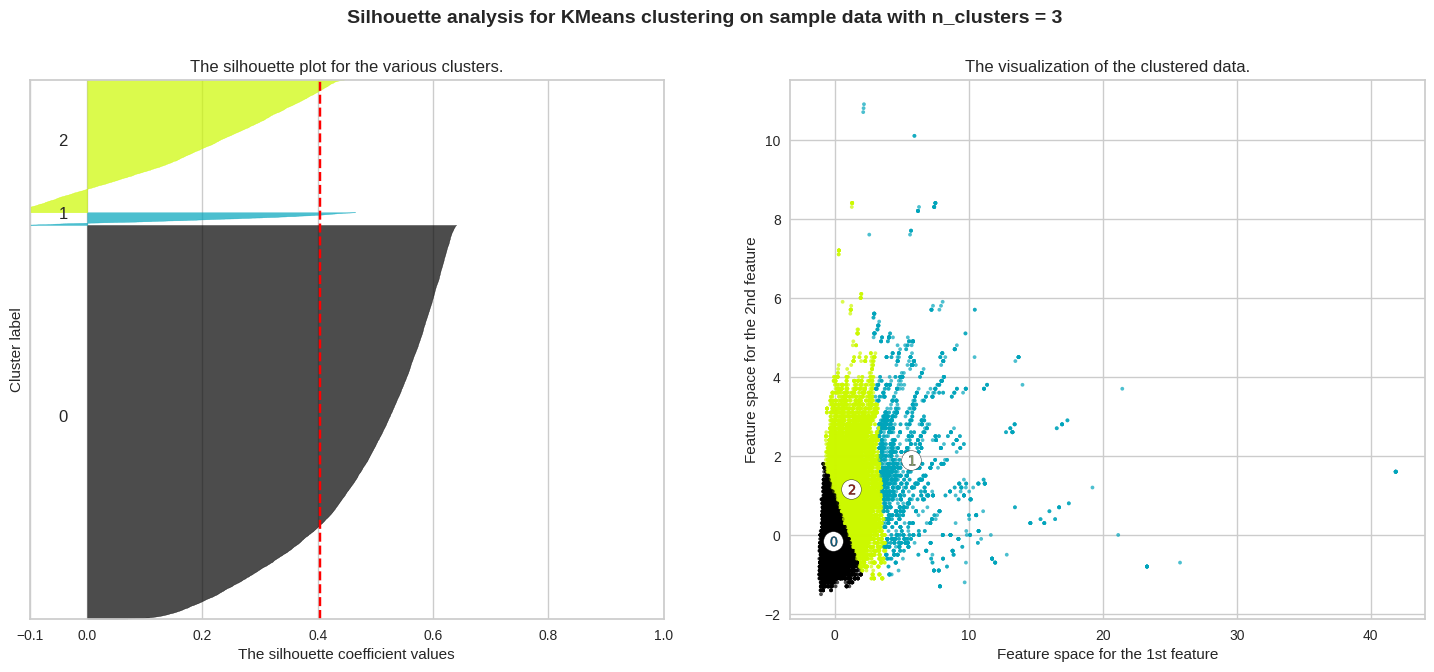

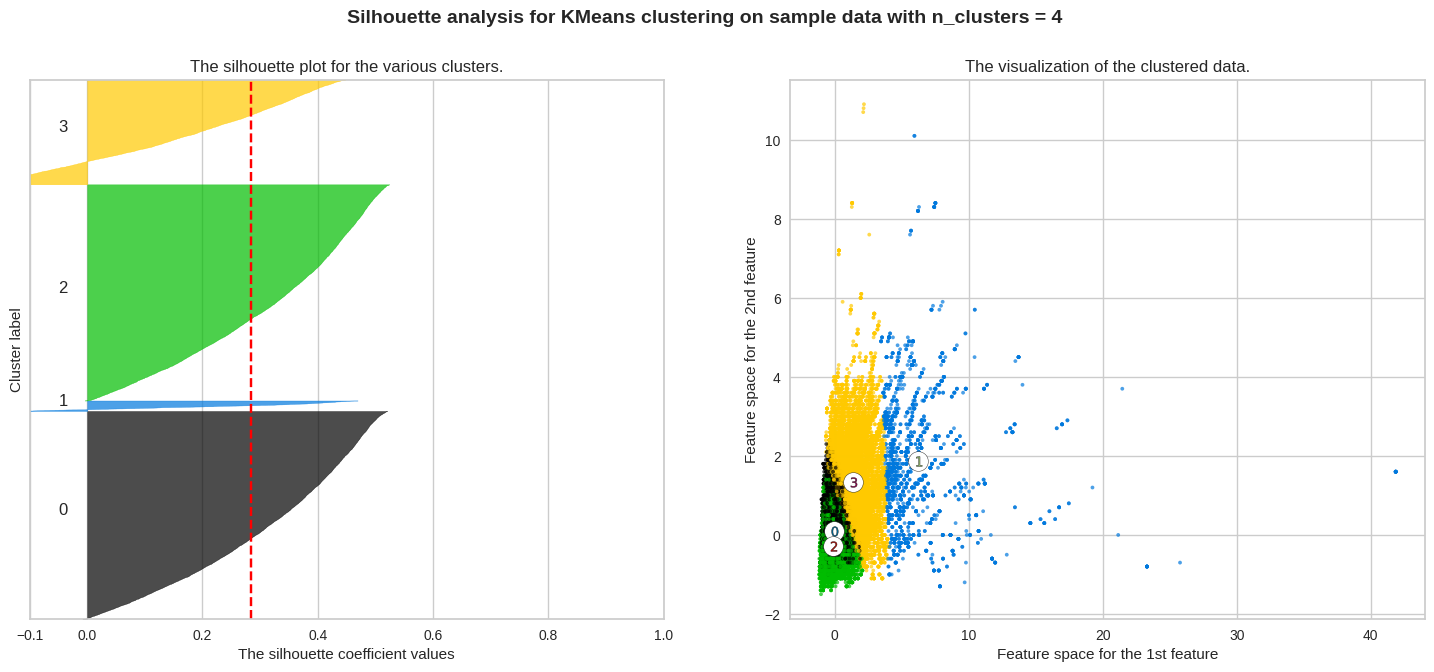

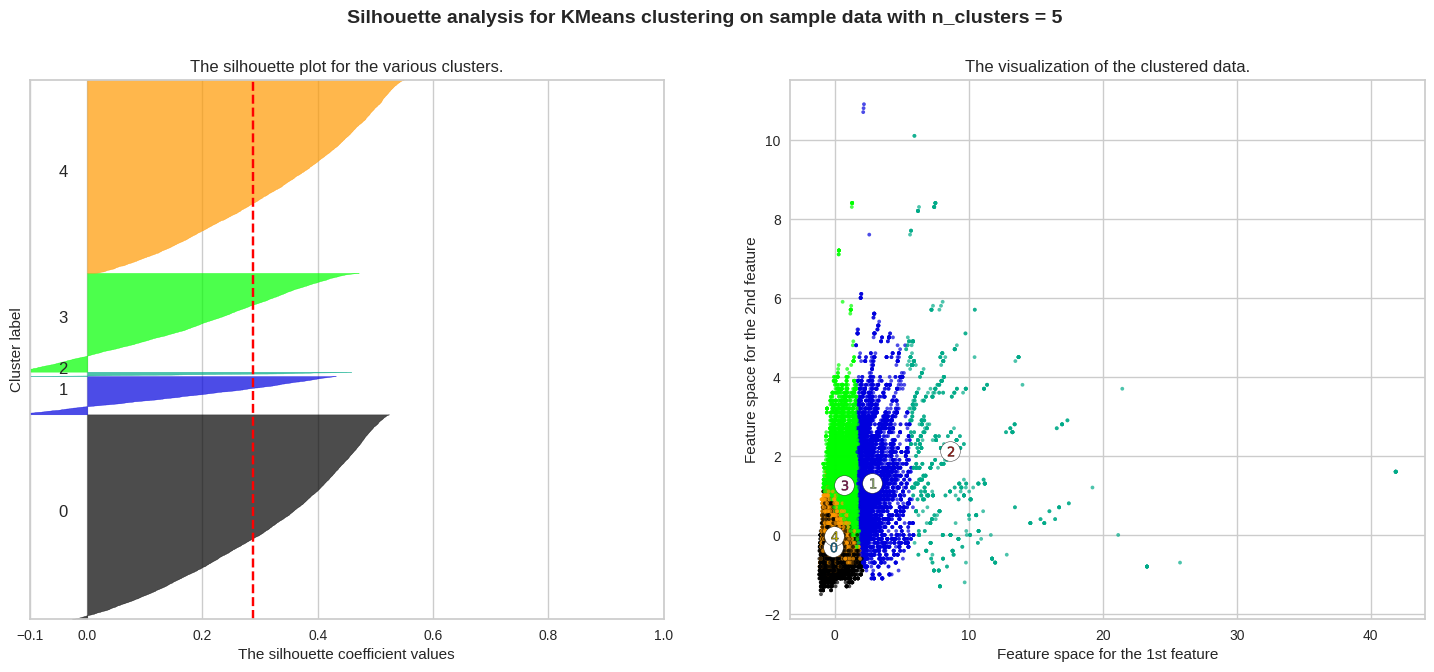

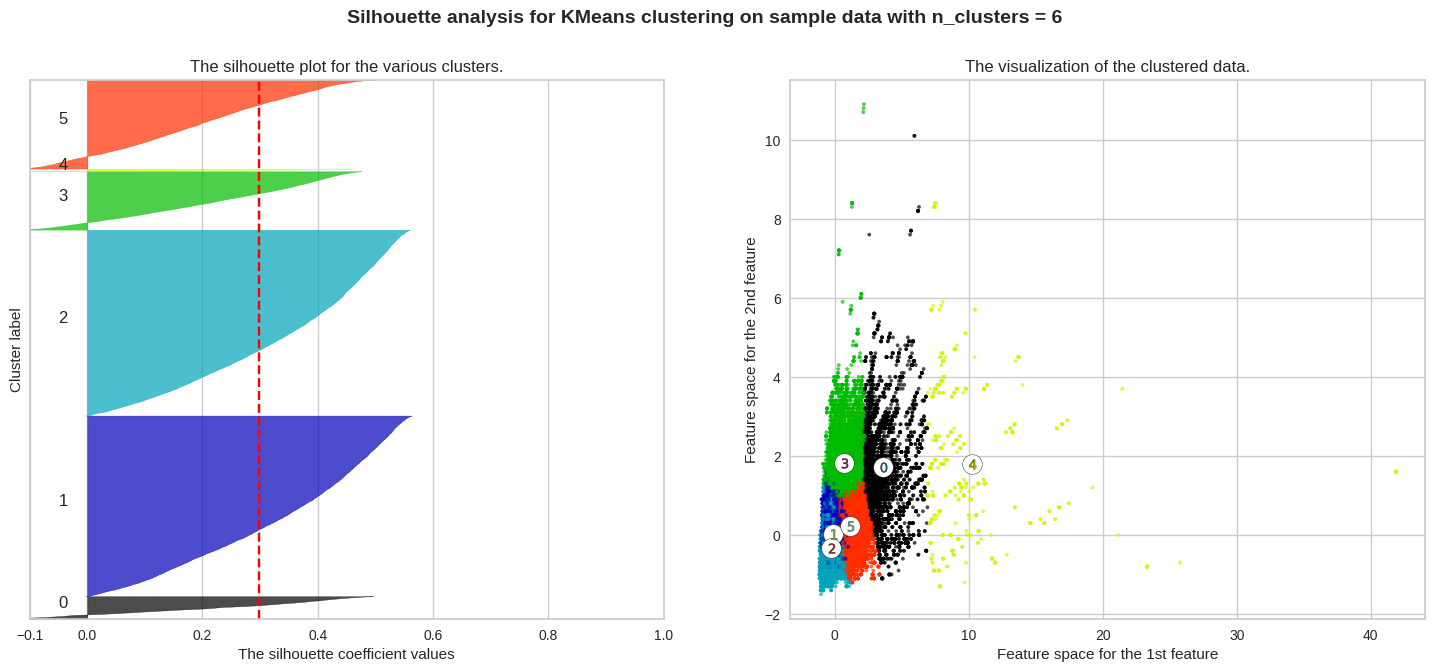

In [ ]:
column = df_after_scale.columns.to_list()
silhoutte_analysis(df_after_scale[column],list(range(3,7)))                   #------Tinggal ganti di variablenya dan rangenya

##Segmentation

*   Based on Elbow method, 3 clusters and 4 clusters seems suitable for our segmentation
*   Based on Silhouette Analysis, 3 clusters has the highest silhouette score : 0.40314980450553567

Decide to use 3 clusters






In [ ]:
# make cluster
df_clustered = df_after_scale.copy()
num_of_cluster = 3

cluster_model = KMeans(n_clusters = num_of_cluster)   #------ Yang di ubah
cluster_model.fit_predict(df_clustered)
df_clustered['cluster'] = cluster_model.labels_
df_clustered.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,TOTAL_SALES_LTM,TXN_CNT_LTM,PROMO_PERCENTAGE,cluster
ACCOUNT_ID,,,,
100000004,2.10,0.30,-0.63,2
100000008,0.70,0.40,0.00,2
100000012,1.03,-0.60,-0.69,0
100000014,3.29,0.90,0.32,2
100000015,1.43,2.60,-0.15,2


<Axes: xlabel='cluster', ylabel='TOTAL_SALES_LTM'>

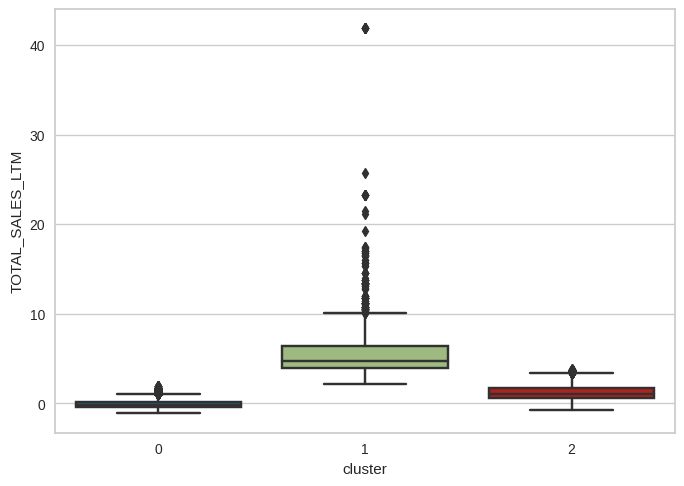

In [ ]:
sns.boxplot (data =df_clustered , x ='cluster' , y ='TOTAL_SALES_LTM')

<Axes: xlabel='cluster', ylabel='TXN_CNT_LTM'>

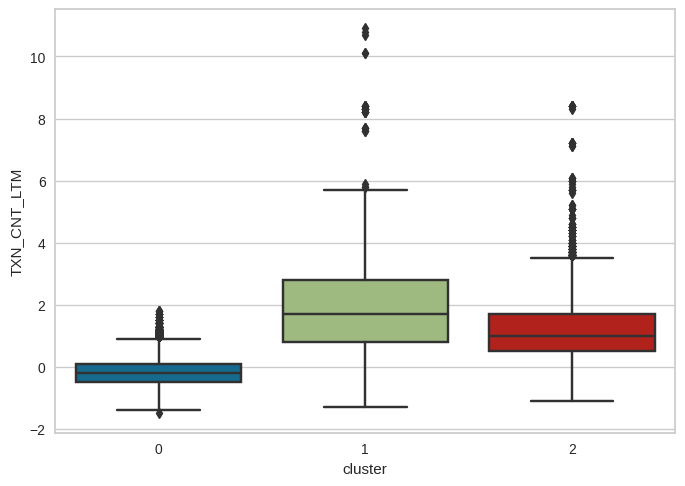

In [ ]:
sns.boxplot (data =df_clustered , x ='cluster' , y ='TXN_CNT_LTM')

<Axes: xlabel='cluster', ylabel='PROMO_PERCENTAGE'>

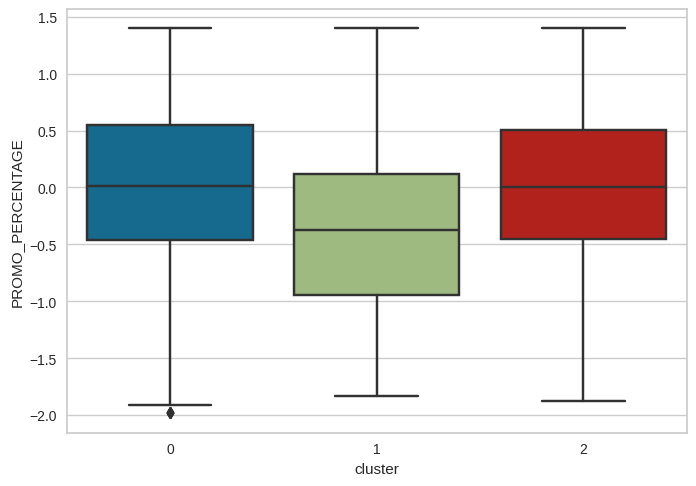

In [ ]:
sns.boxplot (data =df_clustered , x ='cluster' , y ='PROMO_PERCENTAGE')

##Merge Cluster with Dataset

In [ ]:
df_segmentation = df_bank_promotion_eda.copy()

df_segmented = df_clustered.merge(df_segmentation, how= 'inner', on = 'ACCOUNT_ID')
df_segmented

,ACCOUNT_ID,TOTAL_SALES_LTM_x,TXN_CNT_LTM_x,PROMO_PERCENTAGE_x,cluster,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,...,AGE,AGE_GROUP,MOB_GROUP,TOTAL_SALES_L6M,TOTAL_PROMO_SALES_L6M,TOTAL_SALES_LTM_y,TOTAL_PROMO_SALES_LTM,PROMOTION_COST_L6M,PROMO_REVENUE_L6M,PROMO_PERCENTAGE_y
0,100000004,2.10,0.30,-0.63,2,216.00,201.00,200.00,250.00,5.00,...,48,"(40.0, 50.0]","(120.0, 150.0]",1080.00,400.00,4221.00,1750.00,3.00,9.60,0.41
1,100000008,0.70,0.40,0.00,2,143.30,114.10,140.00,150.00,3.00,...,32,"(30.0, 40.0]","(90.0, 120.0]",429.90,280.00,2510.20,1500.00,3.00,6.72,0.60
2,100000012,1.03,-0.60,-0.69,0,263.30,242.70,400.00,290.00,4.00,...,53,"(50.0, 66.0]","(60.0, 90.0]",1053.20,800.00,2912.40,1160.00,3.00,19.20,0.40
3,100000014,3.29,0.90,0.32,2,235.60,210.00,242.90,300.00,8.00,...,40,"(30.0, 40.0]","(60.0, 90.0]",1884.80,1457.40,5670.00,3900.00,9.00,34.98,0.69
4,100000015,1.43,2.60,-0.15,2,98.00,77.50,97.50,90.00,5.00,...,34,"(30.0, 40.0]","(120.0, 150.0]",490.00,390.00,3410.00,1890.00,6.00,9.36,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107653,101059832,-0.53,-0.60,-0.35,0,100.00,84.20,100.00,100.00,2.00,...,44,"(40.0, 50.0]","(120.0, 150.0]",200.00,200.00,1010.40,500.00,3.00,4.80,0.49
107654,101059843,0.68,0.40,-0.68,2,120.00,113.40,120.00,200.00,3.00,...,30,"(20.0, 30.0]","(60.0, 90.0]",360.00,120.00,2494.80,1000.00,1.50,2.88,0.40
107655,101059857,-0.52,1.00,0.76,0,52.90,36.80,46.70,70.00,7.00,...,43,"(40.0, 50.0]","(120.0, 150.0]",370.30,140.10,1030.40,840.00,4.50,3.36,0.82
107656,101059860,1.42,0.50,-0.02,2,195.00,147.30,190.00,200.00,3.00,...,37,"(30.0, 40.0]","(90.0, 120.0]",585.00,380.00,3387.90,2000.00,3.00,9.12,0.59


##Visualize Cluster

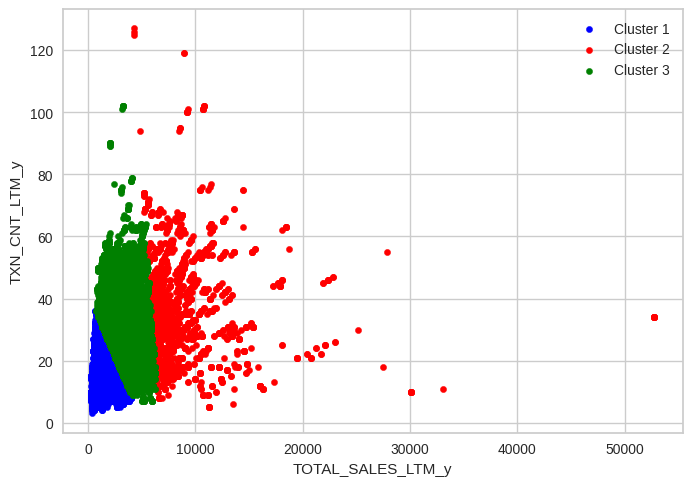

In [ ]:
cluster_scatter = df_segmented[df_segmented['cluster'] == 0].plot.scatter(x='TOTAL_SALES_LTM_y', y='TXN_CNT_LTM_y', c='blue', label='Cluster 1')
cluster_scatter = df_segmented[df_segmented['cluster'] == 1].plot.scatter(x='TOTAL_SALES_LTM_y', y='TXN_CNT_LTM_y', c='red', label='Cluster 2', ax = cluster_scatter)
cluster_scatter = df_segmented[df_segmented['cluster'] == 2].plot.scatter(x='TOTAL_SALES_LTM_y', y='TXN_CNT_LTM_y', c='green', label='Cluster 3', ax = cluster_scatter)

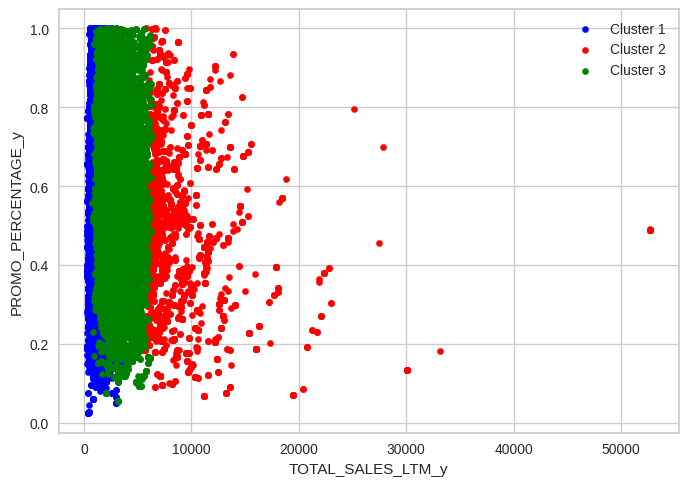

In [ ]:
cluster_scatter = df_segmented[df_segmented['cluster'] == 0].plot.scatter(x='TOTAL_SALES_LTM_y', y='PROMO_PERCENTAGE_y', c='blue', label='Cluster 1')
cluster_scatter = df_segmented[df_segmented['cluster'] == 1].plot.scatter(x='TOTAL_SALES_LTM_y', y='PROMO_PERCENTAGE_y', c='red', label='Cluster 2', ax = cluster_scatter)
cluster_scatter = df_segmented[df_segmented['cluster'] == 2].plot.scatter(x='TOTAL_SALES_LTM_y', y='PROMO_PERCENTAGE_y', c='green', label='Cluster 3', ax = cluster_scatter)


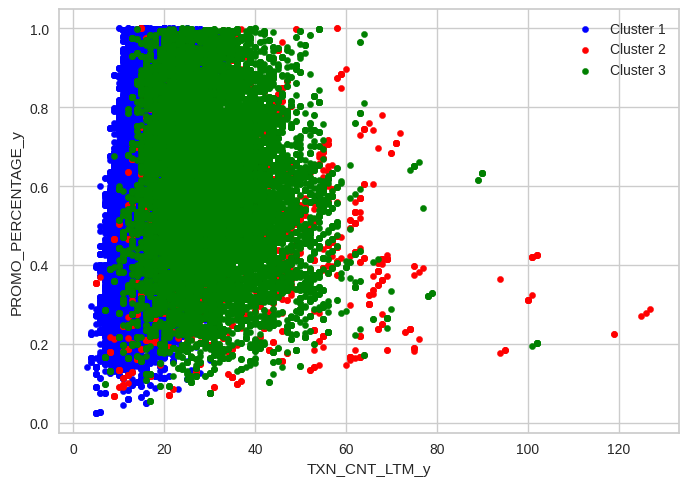

In [ ]:
cluster_scatter = df_segmented[df_segmented['cluster'] == 0].plot.scatter(x='TXN_CNT_LTM_y', y='PROMO_PERCENTAGE_y', c='blue', label='Cluster 1')
cluster_scatter = df_segmented[df_segmented['cluster'] == 1].plot.scatter(x='TXN_CNT_LTM_y', y='PROMO_PERCENTAGE_y', c='red', label='Cluster 2', ax = cluster_scatter)
cluster_scatter = df_segmented[df_segmented['cluster'] == 2].plot.scatter(x='TXN_CNT_LTM_y', y='PROMO_PERCENTAGE_y', c='green', label='Cluster 3', ax = cluster_scatter)

##Descriptive Statistic

In [ ]:
df_segmented.groupby('cluster',as_index = False)[['TOTAL_SALES_LTM_y', 'TXN_CNT_LTM_y', 'PROMO_PERCENTAGE_y']].agg(['count','mean','min','max','median']).T

cluster                          0        1        2
TOTAL_SALES_LTM_y  count  78749.00  2529.00 26380.00
                   mean    1493.38  8659.67  3113.81
                   min      262.50  4262.50   752.40
                   max     4050.40 52751.00  6279.00
                   median  1420.50  7399.60  2970.00
TXN_CNT_LTM_y      count  78749.00  2529.00 26380.00
                   mean      16.44    36.83    29.67
                   min        3.00     5.00     7.00
                   max       36.00   127.00   102.00
                   median    16.00    35.00    28.00
PROMO_PERCENTAGE_y count  78749.00  2529.00 26380.00
                   mean       0.61     0.49     0.60
                   min        0.02     0.07     0.06
                   max        1.00     1.00     1.00
                   median     0.60     0.49     0.60

##Cluster Intepretation

In [ ]:
pd.set_option('display.max_columns',None)
df_segmented.head(5)

,ACCOUNT_ID,TOTAL_SALES_LTM_x,TXN_CNT_LTM_x,PROMO_PERCENTAGE_x,cluster,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM_y,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,CNT_PROMO_L6M,CNT_PROMO_L12M,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE,PROMO_SENSITIVE,AGE,AGE_GROUP,MOB_GROUP,TOTAL_SALES_L6M,TOTAL_PROMO_SALES_L6M,TOTAL_SALES_LTM_y,TOTAL_PROMO_SALES_LTM,PROMOTION_COST_L6M,PROMO_REVENUE_L6M,PROMO_PERCENTAGE_y
0,100000004,2.10,0.30,-0.63,2,216.00,201.00,200.00,250.00,5.00,21.00,2.00,7.00,15.00,9.00,19.00,A,X,0,90587.00,59785.00,32.00,123,1,0,1975-12-17,0,48,"(40.0, 50.0]","(120.0, 150.0]",1080.00,400.00,4221.00,1750.00,3.00,9.60,0.41
1,100000008,0.70,0.40,0.00,2,143.30,114.10,140.00,150.00,3.00,22.00,2.00,10.00,20.00,8.00,13.00,A,X,0,65814.00,32597.00,34.00,109,1,0,1991-12-27,1,32,"(30.0, 40.0]","(90.0, 120.0]",429.90,280.00,2510.20,1500.00,3.00,6.72,0.60
2,100000012,1.03,-0.60,-0.69,0,263.30,242.70,400.00,290.00,4.00,12.00,2.00,4.00,16.00,12.00,27.00,A,X,0,42583.00,0.00,1.00,89,0,0,1970-03-22,0,53,"(50.0, 66.0]","(60.0, 90.0]",1053.20,800.00,2912.40,1160.00,3.00,19.20,0.40
3,100000014,3.29,0.90,0.32,2,235.60,210.00,242.90,300.00,8.00,27.00,6.00,13.00,20.00,9.00,18.00,A,X,0,61176.00,0.00,0.00,86,1,1,1983-11-26,1,40,"(30.0, 40.0]","(60.0, 90.0]",1884.80,1457.40,5670.00,3900.00,9.00,34.98,0.69
4,100000015,1.43,2.60,-0.15,2,98.00,77.50,97.50,90.00,5.00,44.00,4.00,21.00,25.00,8.00,18.00,A,X,0,44525.00,42253.00,22.00,124,1,0,1989-10-21,1,34,"(30.0, 40.0]","(120.0, 150.0]",490.00,390.00,3410.00,1890.00,6.00,9.36,0.55


In [ ]:
df_segmented.columns

Index(['ACCOUNT_ID', 'TOTAL_SALES_LTM_x', 'TXN_CNT_LTM_x',
       'PROMO_PERCENTAGE_x', 'cluster', 'AVG_TXN_AMT_L6M', 'AVG_TXN_AMT_LTM',
       'AVG_PROMO_TXN_AMT_L6M', 'AVG_PROMO_TXN_AMT_LTM', 'TXN_CNT_L6M',
       'TXN_CNT_LTM_y', 'PROMO_TXN_CNT_L6M', 'PROMO_TXN_CNT_LTM',
       'LAST_TXN_DAY', 'CNT_PROMO_L6M', 'CNT_PROMO_L12M', 'CUST_VALUE_GROUP',
       'MAPP_ACTIVE_GROUP', 'HOMEOWNER_STATUS', 'HOME_VALUE', 'PROXY_INCOME',
       'PCT_INCOME_RETIREMENT', 'MOB', 'FLAG_FEMALE', 'PROMO_CHANNEL',
       'BIRTH_DATE', 'PROMO_SENSITIVE', 'AGE', 'AGE_GROUP', 'MOB_GROUP',
       'TOTAL_SALES_L6M', 'TOTAL_PROMO_SALES_L6M', 'TOTAL_SALES_LTM_y',
       'TOTAL_PROMO_SALES_LTM', 'PROMOTION_COST_L6M', 'PROMO_REVENUE_L6M',
       'PROMO_PERCENTAGE_y'],
      dtype='object')

###1) Number of Customers per cluster

In [ ]:
df_segmented.groupby(['cluster'], as_index = False).size()

,cluster,size
0,0,78749
1,1,2529
2,2,26380


Insight:
*   Cluster 0 = 78,749 customers (highest)
*   Cluster 1 =  2,529 customers (lowest)
*   Cluster 2 = 26,380 customers



###2) Lifetime Total Sales, Number of Transaction & Average Sales Amount per Transaction

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['TOTAL_SALES_LTM_y'].agg(['sum','mean'])

,sum,mean
cluster,,
0,117602364.90,1493.38
1,21900293.80,8659.67
2,82142379.40,3113.81


In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['TXN_CNT_LTM_y'].agg(['sum','mean'])

,sum,mean
cluster,,
0,1294430.00,16.44
1,93147.00,36.83
2,782601.00,29.67


In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['AVG_TXN_AMT_LTM'].mean()

,cluster,AVG_TXN_AMT_LTM
0,0,96.36
1,1,303.83
2,2,119.16


Insight Total Sales:
*   Cluster 0 = 1,493 (lowest)
*   Cluster 1 = 8,659 (highest)
*   Cluster 2 = 3,113

Insight Number of Transaction:
*   Cluster 0 = 16 (lowest)
*   Cluster 1 = 37 (highest)
*   Cluster 2 = 30

Insight Sales Amount per Transaction:
*   Cluster 0 =  96 (lowest)
*   Cluster 1 = 304 (highest)
*   Cluster 2 = 119




###3) Promo Percentage & Promo Sensitive

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['PROMO_PERCENTAGE_y'].mean()

,cluster,PROMO_PERCENTAGE_y
0,0,0.61
1,1,0.49
2,2,0.60


In [ ]:
df_segmented.groupby(['cluster', 'PROMO_SENSITIVE'], as_index = False).size()

,cluster,PROMO_SENSITIVE,size
0,0,0,24632
1,0,1,54117
2,1,0,1319
3,1,1,1210
4,2,0,8246
5,2,1,18134


Insight Promo Sales Amount:
*   Cluster 0 = 61%
*   Cluster 1 = 49% (lowest)
*   Cluster 2 = 60%

Insight Promo Sensitive Customers:
*   Cluster 0 = 54,117	68.72%
*   Cluster 1 =  1,210	47.84% (lowest)
*   Cluster 2 = 18,134	68.74%

###4) Last 6 Months Total Sales & Number of Transaction

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['TOTAL_SALES_L6M'].agg(['sum','mean'])

,sum,mean
cluster,,
0,35159314.50,446.47
1,3619952.60,1431.38
2,17859951.80,677.03


In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['TXN_CNT_L6M'].agg(['sum','mean'])

,sum,mean
cluster,,
0,338578.00,4.30
1,12257.00,4.85
2,136262.00,5.17


Insight Total Sales:
*   Cluster 0 = 447 (lowest)
*   Cluster 1 = 1,431 (highest)
*   Cluster 2 = 677

Insight Number of Transaction:
*   Cluster 0 = 4 (lowest)
*   Cluster 1 = 5 (highest)
*   Cluster 2 = 5



###5) Lifetime Revenue, Promo Cost and Gross Profit

In [ ]:
df_segmented['REVENUE_LTM'] = df_segmented['TOTAL_SALES_LTM_y'] * 0.024
df_segmented.groupby(['cluster'], as_index = False)['REVENUE_LTM'].agg(['sum','mean'])

,sum,mean
cluster,,
0,2822456.76,35.84
1,525607.05,207.83
2,1971417.11,74.73


In [ ]:
df_segmented['PROMO_COST_LTM'] = df_segmented['TXN_CNT_LTM_y'] * 1.5
df_segmented.groupby(['cluster'], as_index = False)['PROMO_COST_LTM'].agg(['sum','mean'])

,sum,mean
cluster,,
0,1941645.00,24.66
1,139720.50,55.25
2,1173901.50,44.50


In [ ]:
df_segmented['PROFIT_LTM'] = df_segmented['REVENUE_LTM'] - df_segmented['PROMO_COST_LTM']
df_segmented.groupby(['cluster'], as_index = False)['PROFIT_LTM'].agg(['sum','mean'])

,sum,mean
cluster,,
0,880811.76,11.19
1,385886.55,152.58
2,797515.61,30.23


Insight Revenue:
*   Cluster 0 = 35.84 (lowest)
*   Cluster 1 = 207.83 (highest)
*   Cluster 2 = 74.73

Insight Promo Cost:
*   Cluster 0 = 24.66 (lowest)
*   Cluster 1 = 55.25 (highest)
*   Cluster 2 = 44.50

Insight Gross Profit:
*   Cluster 0 = 11.19 (lowest)
*   Cluster 1 = 152.58 (highest)
*   Cluster 2 = 30.23



###6) Last 6 Months Revenue, Promo Cost and Profit

In [ ]:
df_segmented['REVENUE_L6M'] = df_segmented['TOTAL_SALES_L6M'] * 0.024
df_segmented.groupby(['cluster'], as_index = False)['REVENUE_L6M'].agg(['sum','mean'])

,sum,mean
cluster,,
0,843823.55,10.72
1,86878.86,34.35
2,428638.84,16.25


In [ ]:
df_segmented['PROMO_COST_L6M'] = df_segmented['TXN_CNT_L6M'] * 1.5
df_segmented.groupby(['cluster'], as_index = False)['PROMO_COST_L6M'].agg(['sum','mean'])

,sum,mean
cluster,,
0,507867.00,6.45
1,18385.50,7.27
2,204393.00,7.75


In [ ]:
df_segmented['PROFIT_L6M'] = df_segmented['REVENUE_L6M'] - df_segmented['PROMO_COST_L6M']
df_segmented.groupby(['cluster'], as_index = False)['PROFIT_L6M'].agg(['sum','mean'])

,sum,mean
cluster,,
0,335956.55,4.27
1,68493.36,27.08
2,224245.84,8.50


Insight Revenue:
*   Cluster 0 = 10.72 (lowest)
*   Cluster 1 = 34.35 (highest)
*   Cluster 2 = 16.25

Insight Promo Cost:
*   Cluster 0 = 6.45 (lowest)
*   Cluster 1 = 7.27 (highest)
*   Cluster 2 = 7.75

Insight Gross Profit:
*   Cluster 0 = 4.27 (lowest)
*   Cluster 1 = 27.08 (highest)
*   Cluster 2 = 8.50



###7) Estimation on monthly income

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['PROXY_INCOME'].mean()

,cluster,PROXY_INCOME
0,0,38322.97
1,1,36036.35
2,2,37654.77


Insight:
*   Cluster 0 = 38,323 (highest)
*   Cluster 1 = 36,036 (lowest)
*   Cluster 2 = 37,655

###8) Age

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['AGE'].mean()

,cluster,AGE
0,0,40.97
1,1,41.10
2,2,40.99


Insight:
*   Cluster 0 = 41
*   Cluster 1 = 41
*   Cluster 2 = 41

###9) Gender

In [ ]:
df_segmented.groupby(['cluster', 'FLAG_FEMALE'], as_index = False)['ACCOUNT_ID'].count()

,cluster,FLAG_FEMALE,ACCOUNT_ID
0,0,0,32701
1,0,1,46048
2,1,0,1094
3,1,1,1435
4,2,0,10828
5,2,1,15552


In [ ]:
Insight:
*   Cluster 0 = Female, Male
*   Cluster 1 = Female, Male
*   Cluster 2 = Female, Male

###10) Home

In [ ]:
df_segmented.groupby(['cluster', 'HOMEOWNER_STATUS'], as_index = False)['ACCOUNT_ID'].count()

,cluster,HOMEOWNER_STATUS,ACCOUNT_ID
0,0,0,36281
1,0,1,42468
2,1,0,1333
3,1,1,1196
4,2,0,13128
5,2,1,13252


Insight:
*   Cluster 0 = 53.93%
*   Cluster 1 = 47.29%
*   Cluster 2 = 50.24%





###11) MOB

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['MOB'].mean()

,cluster,MOB
0,0,96.75
1,1,113.81
2,2,113.29


Insight:
*   Cluster 0 = 97
*   Cluster 1 = 114
*   Cluster 2 = 113

###12) Customer Value Group

In [ ]:
df_segmented.groupby(['cluster', 'CUST_VALUE_GROUP'], as_index = False)['ACCOUNT_ID'].count()

,cluster,CUST_VALUE_GROUP,ACCOUNT_ID
0,0,A,11123
1,0,B,12775
2,0,C,13194
3,0,D,8857
4,0,E,32800
5,1,A,663
6,1,B,429
7,1,C,306
8,1,D,241
9,1,E,890


Insight:
*   Cluster 0 = E, C, B, A, D
*   Cluster 1 = E, A, B, C, D
*   Cluster 2 = E, A, C, B, D

###13) Account Activity Group

In [ ]:
df_segmented.groupby(['cluster', 'MAPP_ACTIVE_GROUP'], as_index = False)['ACCOUNT_ID'].count()

,cluster,MAPP_ACTIVE_GROUP,ACCOUNT_ID
0,0,X,73144
1,0,Y,5255
2,0,Z,350
3,1,X,2355
4,1,Y,147
5,1,Z,27
6,2,X,24642
7,2,Y,1634
8,2,Z,104


Insight:
*   Cluster 0 = X, Y, Z
*   Cluster 1 = X, Y, Z
*   Cluster 2 = X, Y, Z

###14) Promo Channel

In [ ]:
df_segmented.groupby(['cluster', 'PROMO_CHANNEL'], as_index = False)['ACCOUNT_ID'].count()

,cluster,PROMO_CHANNEL,ACCOUNT_ID
0,0,0,55086
1,0,1,23663
2,1,0,1756
3,1,1,773
4,2,0,18457
5,2,1,7923


Insight:
*   Cluster 0 = SMS, Email
*   Cluster 1 = SMS, Email
*   Cluster 2 = SMS, Email